In [ ]:
#!pip install ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Smartphone-Based Recognition of Human Activities and Postural Transitions

## 2. Dimensions and first 5 lines

In [ ]:
DATA_DIR = "/Users/josueh/Desktop/Fusión de datos con Python/notebooks/SMARTPHONE-BASED_ACTIVITY_RECOGNITION/Users/RawData"

labels = pd.read_csv(os.path.join(DATA_DIR, "labels.txt"),
                     sep="\\s+",
                     header=None,
                     names=["exp_id", "user_id", "activity_id", "start", "end"])

activity_map = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING",
    7: "STAND_TO_SIT",
    8: "SIT_TO_STAND",
    9: "SIT_TO_LIE",
    10: "LIE_TO_SIT",
    11: "STAND_TO_LIE",
    12: "LIE_TO_STAND"
}
labels["Activity"] = labels["activity_id"].map(activity_map)

merged_data = []

for _, row in labels.iterrows():
    exp = row["exp_id"]
    user = row["user_id"]
    start = row["start"]
    end = row["end"]

    acc_path = os.path.join(DATA_DIR, f"acc_exp{exp:02d}_user{user:02d}.txt")
    gyro_path = os.path.join(DATA_DIR, f"gyro_exp{exp:02d}_user{user:02d}.txt")

    acc = pd.read_csv(acc_path, sep="\\s+", header=None, names=["X axis_acc", "Y axis_acc", "Z axis_acc"])
    gyro = pd.read_csv(gyro_path, sep="\\s+", header=None, names=["X axis_gyro", "Y axis_gyro", "Z axis_gyro"])

    acc_slice = acc.iloc[start-1:end].reset_index(drop=True)
    gyro_slice = gyro.iloc[start-1:end].reset_index(drop=True)

    combined = pd.concat([acc_slice, gyro_slice], axis=1)
    combined["Activity"] = row["Activity"]
    combined["User"] = user
    combined["Experiment"] = exp

    merged_data.append(combined)

# Combine everything into one big DataFrame
full_dataset = pd.concat(merged_data, ignore_index=True)

full_dataset = full_dataset.drop(['User', 'Experiment'], axis=1)


In [ ]:
display(full_dataset)
print(f"Dimensions: {full_dataset.shape}\n")
print(full_dataset["Activity"].value_counts())

,X axis_acc,Y axis_acc,Z axis_acc,X axis_gyro,Y axis_gyro,Z axis_gyro,Activity
0,1.020833,-0.125000,0.104167,-0.000916,0.001833,0.002749,STANDING
1,1.020833,-0.125000,0.105556,-0.002749,-0.004276,0.002749,STANDING
2,1.025000,-0.125000,0.101389,-0.000305,-0.002138,0.006109,STANDING
3,1.020833,-0.125000,0.104167,0.012217,0.000916,-0.007330,STANDING
4,1.016667,-0.125000,0.108333,0.011301,-0.001833,-0.006414,STANDING
...,...,...,...,...,...,...,...
815609,0.950000,-0.443056,-0.187500,1.184773,1.112386,-0.307876,WALKING_UPSTAIRS
815610,0.880556,-0.390278,-0.156944,1.163698,1.106277,-0.374155,WALKING_UPSTAIRS
815611,0.834722,-0.358333,-0.098611,1.177137,1.023810,-0.388816,WALKING_UPSTAIRS
815612,0.802778,-0.329167,-0.104167,1.213484,0.918130,-0.332311,WALKING_UPSTAIRS


Dimensions: (815614, 7)

Activity
STANDING              138105
LAYING                136865
SITTING               126677
WALKING               122091
WALKING_UPSTAIRS      116707
WALKING_DOWNSTAIRS    107961
STAND_TO_LIE           14418
SIT_TO_LIE             12428
LIE_TO_SIT             11150
LIE_TO_STAND           10867
STAND_TO_SIT           10316
SIT_TO_STAND            8029
Name: count, dtype: int64


## 3. Handling missing data

In [ ]:
print(f"Na values for sensors data: {full_dataset.isna().values.any()}")
print(f"Null values for sensors data: {full_dataset.isnull().values.any()}")

Na values for sensors data: False
Null values for sensors data: False


## 4. Data types per attribute

X axis_acc     float64
Y axis_acc     float64
Z axis_acc     float64
X axis_gyro    float64
Y axis_gyro    float64
Z axis_gyro    float64
Activity        object
dtype: object



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815614 entries, 0 to 815613
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   X axis_acc   815614 non-null  float64
 1   Y axis_acc   815614 non-null  float64
 2   Z axis_acc   815614 non-null  float64
 3   X axis_gyro  815614 non-null  float64
 4   Y axis_gyro  815614 non-null  float64
 5   Z axis_gyro  815614 non-null  float64
 6   Activity     815614 non-null  object 
dtypes: float64(6), object(1)
memory usage: 43.6+ MB


None

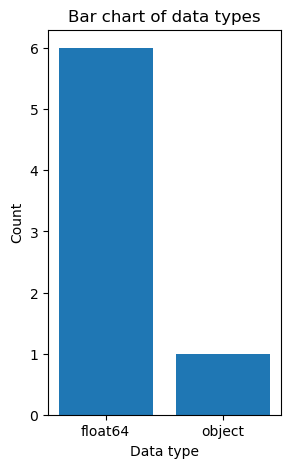

In [ ]:
display(full_dataset.dtypes)

print("\n")

display(full_dataset.info())

print("\n")

dtype_counts = full_dataset.dtypes.value_counts()

plt.figure(figsize=(3, 5))
plt.bar(dtype_counts.index.astype(str), dtype_counts.values)

plt.xlabel("Data type")
plt.ylabel("Count")
plt.title("Bar chart of data types")
plt.show()




## 5. Statistical summaries

### 5.1. For all attributes

In [ ]:
display(full_dataset.describe())

# Remove last column of strings and compute skewness
skewness = full_dataset.iloc[:, :-1].skew()
kurtosis = full_dataset.iloc[:, :-1].kurt()



print("Skewness: \n")
display(skewness)

print("\nKurtosis: \n")
display(kurtosis)



,X axis_acc,Y axis_acc,Z axis_acc,X axis_gyro,Y axis_gyro,Z axis_gyro
count,815614.000000,815614.000000,815614.000000,815614.000000,815614.000000,815614.000000
mean,0.806468,0.032947,0.087695,0.009292,-0.003563,-0.005986
std,0.409161,0.405570,0.345823,0.440613,0.411000,0.298523
min,-0.647222,-1.698611,-1.837500,-5.249165,-6.323371,-3.124270
25%,0.675000,-0.223611,-0.119444,-0.048258,-0.073915,-0.038485
50%,0.950000,-0.072222,0.045833,0.007025,0.000611,-0.000305
75%,1.019445,0.213889,0.238889,0.077885,0.047953,0.044593
max,2.004167,1.716667,1.502778,5.964488,6.240294,3.408628


Skewness: 



X axis_acc    -0.707468
Y axis_acc     0.731837
Z axis_acc     0.390440
X axis_gyro   -0.204585
Y axis_gyro    0.393263
Z axis_gyro   -0.202577
dtype: float64


Kurtosis: 



X axis_acc     0.256857
Y axis_acc     0.036421
Z axis_acc     0.542543
X axis_gyro    8.599942
Y axis_gyro    8.991414
Z axis_gyro    6.135584
dtype: float64

### 5.2. For all activities

In [ ]:
full_dataset.groupby("Activity").describe()

X axis_acc                                          \
                        count      mean       std       min       25%   
Activity                                                                
LAYING               136865.0  0.068684  0.134152 -0.523611 -0.012500   
LIE_TO_SIT            11150.0  0.672231  0.371905 -0.472222  0.379514   
LIE_TO_STAND          10867.0  0.664515  0.391104 -0.647222  0.291667   
SITTING              126677.0  0.957249  0.096331  0.426389  0.937500   
SIT_TO_LIE            12428.0  0.569750  0.375277 -0.497222  0.227778   
SIT_TO_STAND           8029.0  0.943345  0.129987  0.376389  0.869444   
STANDING             138105.0  1.001342  0.029063  0.605556  0.990278   
STAND_TO_LIE          14418.0  0.637869  0.383902 -0.600000  0.315278   
STAND_TO_SIT          10316.0  0.941518  0.132565 -0.304167  0.883333   
WALKING              122091.0  0.997615  0.236304 -0.148611  0.825000   
WALKING_DOWNSTAIRS   107961.0  0.996372  0.375211 -0.108333  0.733333   
WALKING_UPSTAIRS     116707.0  0.952509  0.262548 -0.002778  0.766667   

                                                 Y axis_acc            ...  \
                         50%       75%       max      count      mean  ...   
Activity                                                               ...   
LAYING              0.073611  0.176389  0.486111   136865.0  0.637964  ...   
LIE_TO_SIT          0.815278  0.973611  1.947222    11150.0  0.352802  ...   
LIE_TO_STAND        0.801389  0.972222  1.988889    10867.0  0.333360  ...   
SITTING             0.993056  1.018056  1.313889   126677.0  0.128840  ...   
SIT_TO_LIE          0.650000  0.913889  1.390278    12428.0  0.484444  ...   
SIT_TO_STAND        0.961111  1.015278  1.755556     8029.0 -0.138365  ...   
STANDING            1.009722  1.019445  1.566667   138105.0 -0.166308  ...   
STAND_TO_LIE        0.759722  0.952778  1.640278    14418.0  0.323216  ...   
STAND_TO_SIT        0.959722  1.013889  1.958333    10316.0 -0.110421  ...   
WALKING             0.968056  1.154167  1.966667   122091.0 -0.179961  ...   
WALKING_DOWNSTAIRS  0.894445  1.219444  2.004167   107961.0 -0.152532  ...   
WALKING_UPSTAIRS    0.919444  1.098611  1.980556   116707.0 -0.268568  ...   

                   Y axis_gyro           Z axis_gyro                      \
                           75%       max       count      mean       std   
Activity                                                                   
LAYING                0.013439  1.464549    136865.0 -0.000195  0.037667   
LIE_TO_SIT            0.161879  1.984396     11150.0  0.348931  0.511123   
LIE_TO_STAND          0.225562  4.145331     10867.0  0.370827  0.500316   
SITTING               0.010690  1.839926    126677.0 -0.001254  0.044391   
SIT_TO_LIE            0.307112  3.280346     12428.0 -0.281594  0.425595   
SIT_TO_STAND          0.159130  1.590999      8029.0  0.153865  0.539397   
STANDING              0.010996  3.367700    138105.0  0.001244  0.060386   
STAND_TO_LIE          0.434631  3.094033     14418.0 -0.303860  0.453017   
STAND_TO_SIT          0.290543  4.190841     10316.0 -0.095670  0.487337   
WALKING               0.300240  4.782769    122091.0 -0.002946  0.343126   
WALKING_DOWNSTAIRS    0.378126  6.240294    107961.0  0.004181  0.393895   
WALKING_UPSTAIRS      0.244041  5.245194    116707.0 -0.044972  0.406881   

                                                                      
                         min       25%       50%       75%       max  
Activity                                                              
LAYING             -0.935235 -0.005498 -0.000305  0.005498  1.338711  
LIE_TO_SIT         -1.297172 -0.020769  0.311694  0.709215  2.144748  
LIE_TO_STAND       -3.124270  0.032223  0.353996  0.715629  2.654515  
SITTING            -0.955393 -0.007330 -0.000611  0.006109  1.110248  
SIT_TO_LIE         -2.494774 -0.575130 -0.229991  0.026649  1.423621  
SIT_TO_STAND       -2.632524 -0.168293  0.0

### 5.3. Grouped by activity (accelerometer)

In [ ]:
full_dataset.iloc[:, :3].groupby(full_dataset["Activity"]).describe()

X axis_acc                                          \
                        count      mean       std       min       25%   
Activity                                                                
LAYING               136865.0  0.068684  0.134152 -0.523611 -0.012500   
LIE_TO_SIT            11150.0  0.672231  0.371905 -0.472222  0.379514   
LIE_TO_STAND          10867.0  0.664515  0.391104 -0.647222  0.291667   
SITTING              126677.0  0.957249  0.096331  0.426389  0.937500   
SIT_TO_LIE            12428.0  0.569750  0.375277 -0.497222  0.227778   
SIT_TO_STAND           8029.0  0.943345  0.129987  0.376389  0.869444   
STANDING             138105.0  1.001342  0.029063  0.605556  0.990278   
STAND_TO_LIE          14418.0  0.637869  0.383902 -0.600000  0.315278   
STAND_TO_SIT          10316.0  0.941518  0.132565 -0.304167  0.883333   
WALKING              122091.0  0.997615  0.236304 -0.148611  0.825000   
WALKING_DOWNSTAIRS   107961.0  0.996372  0.375211 -0.108333  0.733333   
WALKING_UPSTAIRS     116707.0  0.952509  0.262548 -0.002778  0.766667   

                                                 Y axis_acc            ...  \
                         50%       75%       max      count      mean  ...   
Activity                                                               ...   
LAYING              0.073611  0.176389  0.486111   136865.0  0.637964  ...   
LIE_TO_SIT          0.815278  0.973611  1.947222    11150.0  0.352802  ...   
LIE_TO_STAND        0.801389  0.972222  1.988889    10867.0  0.333360  ...   
SITTING             0.993056  1.018056  1.313889   126677.0  0.128840  ...   
SIT_TO_LIE          0.650000  0.913889  1.390278    12428.0  0.484444  ...   
SIT_TO_STAND        0.961111  1.015278  1.755556     8029.0 -0.138365  ...   
STANDING            1.009722  1.019445  1.566667   138105.0 -0.166308  ...   
STAND_TO_LIE        0.759722  0.952778  1.640278    14418.0  0.323216  ...   
STAND_TO_SIT        0.959722  1.013889  1.958333    10316.0 -0.110421  ...   
WALKING             0.968056  1.154167  1.966667   122091.0 -0.179961  ...   
WALKING_DOWNSTAIRS  0.894445  1.219444  2.004167   107961.0 -0.152532  ...   
WALKING_UPSTAIRS    0.919444  1.098611  1.980556   116707.0 -0.268568  ...   

                                       Z axis_acc                      \
                         75%       max      count      mean       std   
Activity                                                                
LAYING              0.880556  1.676389   136865.0  0.541338  0.386362   
LIE_TO_SIT          0.656944  1.255556    11150.0  0.313043  0.294967   
LIE_TO_STAND        0.695833  1.233333    10867.0  0.165808  0.376300   
SITTING             0.262500  0.644444   126677.0  0.146163  0.201699   
SIT_TO_LIE          0.779167  1.716667    12428.0  0.241071  0.373067   
SIT_TO_STAND        0.023611  0.688889     8029.0 -0.016245  0.276693   
STANDING           -0.104167  0.423611   138105.0 -0.020766  0.152715   
STAND_TO_LIE        0.680556  1.634722    14418.0  0.267781  0.368528   
STAND_TO_SIT        0.127778  0.791667    10316.0  0.026157  0.270360   
WALKING            -0.045833  0.680556   122091.0 -0.059898  0.210327   
WALKING_DOWNSTAIRS -0.013889  0.919444   107961.0 -0.054831  0.225922   
WALKING_UPSTAIRS   -0.141667  0.697222   116707.0 -0.147967  0.248122   

                                                                      
                         min       25%       50%       75%       max  
Activity                                                              
LAYING             -1.051389  0.397222  0.637500  0.819444  1.269444  
LIE_TO_SIT         -0.601389  0.112500  0.312500  0.525000  1.045833  
LIE_TO_STAND       -1.441667 -0.077778  0.120833  0.419444  1.106944  
SITTING            -0.518056  0.002778  0.165278  0.265278  0.734722  
SIT_TO_LIE         -1.533333 -0.012500  0.236111  0.512500  1.393056  
SIT_TO_STAND       -1.040278 -0.202778  0.001389  0.161111  0.738889  
STANDING         

### 5.4. Grouped by activity (gyroscope)

In [ ]:
full_dataset.iloc[:, 3:].groupby(full_dataset["Activity"]).describe()

X axis_gyro                                          \
                         count      mean       std       min       25%   
Activity                                                                 
LAYING                136865.0  0.006827  0.077528 -3.524082 -0.001527   
LIE_TO_SIT             11150.0  0.259984  0.522768 -2.172542 -0.042455   
LIE_TO_STAND           10867.0  0.217037  0.614861 -3.190244 -0.115148   
SITTING               126677.0  0.006761  0.042528 -1.255633  0.001833   
SIT_TO_LIE             12428.0 -0.264125  0.542471 -3.396716 -0.548862   
SIT_TO_STAND            8029.0 -0.030347  0.224270 -1.643838 -0.149051   
STANDING              138105.0  0.015178  0.192753 -3.741550 -0.008858   
STAND_TO_LIE           14418.0 -0.028896  0.704970 -3.198185 -0.414090   
STAND_TO_SIT           10316.0  0.019864  0.379952 -2.462092 -0.123089   
WALKING               122091.0  0.002748  0.514968 -4.473366 -0.331700   
WALKING_DOWNSTAIRS    107961.0 -0.265104  0.678136 -5.249165 -0.611782   
WALKING_UPSTAIRS      116707.0  0.260973  0.528513 -4.232685 -0.081551   

                                                 Y axis_gyro            ...  \
                         50%       75%       max       count      mean  ...   
Activity                                                                ...   
LAYING              0.006720  0.014661  2.637411    136865.0  0.001715  ...   
LIE_TO_SIT          0.149967  0.510989  2.811813     11150.0 -0.151224  ...   
LIE_TO_STAND        0.158825  0.559553  2.775161     10867.0 -0.073099  ...   
SITTING             0.007025  0.012523  1.108415    126677.0  0.001433  ...   
SIT_TO_LIE         -0.165239  0.051007  5.964488     12428.0  0.028946  ...   
SIT_TO_STAND       -0.023824  0.088575  2.145359      8029.0 -0.117572  ...   
STANDING            0.006414  0.021075  3.589444    138105.0 -0.003863  ...   
STAND_TO_LIE       -0.059407  0.217773  5.320331     14418.0  0.109836  ...   
STAND_TO_SIT        0.034514  0.182038  2.154216     10316.0  0.074417  ...   
WALKING             0.012523  0.339336  4.340198    122091.0  0.001588  ...   
WALKING_DOWNSTAIRS -0.187841  0.159130  5.248859    107961.0  0.056538  ...   
WALKING_UPSTAIRS    0.198226  0.545197  3.893655    116707.0 -0.071748  ...   

                                       Z axis_gyro                      \
                         75%       max       count      mean       std   
Activity                                                                 
LAYING              0.013439  1.464549    136865.0 -0.000195  0.037667   
LIE_TO_SIT          0.161879  1.984396     11150.0  0.348931  0.511123   
LIE_TO_STAND        0.225562  4.145331     10867.0  0.370827  0.500316   
SITTING             0.010690  1.839926    126677.0 -0.001254  0.044391   
SIT_TO_LIE          0.307112  3.280346     12428.0 -0.281594  0.425595   
SIT_TO_STAND        0.159130  1.590999      8029.0  0.153865  0.539397   
STANDING            0.010996  3.367700    138105.0  0.001244  0.060386   
STAND_TO_LIE        0.434631  3.094033     14418.0 -0.303860  0.453017   
STAND_TO_SIT        0.290543  4.190841     10316.0 -0.095670  0.487337   
WALKING             0.300240  4.782769    122091.0 -0.002946  0.343126   
WALKING_DOWNSTAIRS  0.378126  6.240294    107961.0  0.004181  0.393895   
WALKING_UPSTAIRS    0.244041  5.245194    116707.0 -0.044972  0.406881   

                                                                      
                         min       25%       50%       75%       max  
Activity                                                              
LAYING             -0.935235 -0.005498 -0.000305  0.005498  1.338711  
LIE_TO_SIT         -1.297172 -0.020769  0.311694  0.709215  2.144748  
LIE_TO_STAND       -3.124270  0.032223  0.353996  0.715629  2.654515  
SITTING            -0.955393 -0.007330 -0.000611  0.006109  1.110248  
SIT_TO_LIE         -2.494774 -0.575130 -0.229991  0.026649  1.423621  
SIT_TO_STAND       -2.632524 -0.168293  0.0

### 5.5. Grouped by activity (X axis both sensors)

In [ ]:
full_dataset[["X axis_acc", "X axis_gyro", "Activity"]].groupby("Activity").describe()

X axis_acc                                          \
                        count      mean       std       min       25%   
Activity                                                                
LAYING               136865.0  0.068684  0.134152 -0.523611 -0.012500   
LIE_TO_SIT            11150.0  0.672231  0.371905 -0.472222  0.379514   
LIE_TO_STAND          10867.0  0.664515  0.391104 -0.647222  0.291667   
SITTING              126677.0  0.957249  0.096331  0.426389  0.937500   
SIT_TO_LIE            12428.0  0.569750  0.375277 -0.497222  0.227778   
SIT_TO_STAND           8029.0  0.943345  0.129987  0.376389  0.869444   
STANDING             138105.0  1.001342  0.029063  0.605556  0.990278   
STAND_TO_LIE          14418.0  0.637869  0.383902 -0.600000  0.315278   
STAND_TO_SIT          10316.0  0.941518  0.132565 -0.304167  0.883333   
WALKING              122091.0  0.997615  0.236304 -0.148611  0.825000   
WALKING_DOWNSTAIRS   107961.0  0.996372  0.375211 -0.108333  0.733333   
WALKING_UPSTAIRS     116707.0  0.952509  0.262548 -0.002778  0.766667   

                                                 X axis_gyro            \
                         50%       75%       max       count      mean   
Activity                                                                 
LAYING              0.073611  0.176389  0.486111    136865.0  0.006827   
LIE_TO_SIT          0.815278  0.973611  1.947222     11150.0  0.259984   
LIE_TO_STAND        0.801389  0.972222  1.988889     10867.0  0.217037   
SITTING             0.993056  1.018056  1.313889    126677.0  0.006761   
SIT_TO_LIE          0.650000  0.913889  1.390278     12428.0 -0.264125   
SIT_TO_STAND        0.961111  1.015278  1.755556      8029.0 -0.030347   
STANDING            1.009722  1.019445  1.566667    138105.0  0.015178   
STAND_TO_LIE        0.759722  0.952778  1.640278     14418.0 -0.028896   
STAND_TO_SIT        0.959722  1.013889  1.958333     10316.0  0.019864   
WALKING             0.968056  1.154167  1.966667    122091.0  0.002748   
WALKING_DOWNSTAIRS  0.894445  1.219444  2.004167    107961.0 -0.265104   
WALKING_UPSTAIRS    0.919444  1.098611  1.980556    116707.0  0.260973   

                                                                                
                         std       min       25%       50%       75%       max  
Activity                                                                        
LAYING              0.077528 -3.524082 -0.001527  0.006720  0.014661  2.637411  
LIE_TO_SIT          0.522768 -2.172542 -0.042455  0.149967  0.510989  2.811813  
LIE_TO_STAND        0.614861 -3.190244 -0.115148  0.158825  0.559553  2.775161  
SITTING             0.042528 -1.255633  0.001833  0.007025  0.012523  1.108415  
SIT_TO_LIE          0.542471 -3.396716 -0.548862 -0.165239  0.051007  5.964488  
SIT_TO_STAND        0.224270 -1.643838 -0.149051 -0.023824  0.088575  2.145359  
STANDING            0.192753 -3.741550 -0.008858  0.006414  0.021075  3.589444  
STAND_TO_LIE        0.704970 -3.198185 -0.414090 -0.059407  0.217773  5.320331  
STAND_TO_SIT        0.379952 -2.462092 -0.123089  0.034514  0.182038  2.154216  
WALKING             0.514968 -4.473366 -0.331700  0.012523  0.339336  4.340198  
WALKING_DOWNSTAIRS  0.678136 -5.249165 -0.611782 -0.187841  0.159130  5.248859  
WALKING_UPSTAIRS    0.528513 -4.232685 -0.081551  0.198226  0.545197  3.893655

### 5.6. Group by activity (Y axis both sensors)

In [ ]:
full_dataset[["Y axis_acc", "Y axis_gyro", "Activity"]].groupby("Activity").describe()

Y axis_acc                                          \
                        count      mean       std       min       25%   
Activity                                                                
LAYING               136865.0  0.637964  0.378166 -1.525000  0.537500   
LIE_TO_SIT            11150.0  0.352802  0.373851 -1.163889  0.058333   
LIE_TO_STAND          10867.0  0.333360  0.426074 -1.361111 -0.011111   
SITTING              126677.0  0.128840  0.198695 -0.605556 -0.009722   
SIT_TO_LIE            12428.0  0.484444  0.374266 -1.484722  0.233333   
SIT_TO_STAND           8029.0 -0.138365  0.275911 -0.880556 -0.325000   
STANDING             138105.0 -0.166308  0.113910 -0.862500 -0.233333   
STAND_TO_LIE          14418.0  0.323216  0.431206 -1.356944 -0.008333   
STAND_TO_SIT          10316.0 -0.110421  0.295371 -1.088889 -0.327778   
WALKING              122091.0 -0.179961  0.203191 -1.626389 -0.288889   
WALKING_DOWNSTAIRS   107961.0 -0.152532  0.217309 -1.698611 -0.255556   
WALKING_UPSTAIRS     116707.0 -0.268568  0.212435 -1.613889 -0.390278   

                                                 Y axis_gyro            \
                         50%       75%       max       count      mean   
Activity                                                                 
LAYING              0.752778  0.880556  1.676389    136865.0  0.001715   
LIE_TO_SIT          0.338889  0.656944  1.255556     11150.0 -0.151224   
LIE_TO_STAND        0.361111  0.695833  1.233333     10867.0 -0.073099   
SITTING             0.104167  0.262500  0.644444    126677.0  0.001433   
SIT_TO_LIE          0.533333  0.779167  1.716667     12428.0  0.028946   
SIT_TO_STAND       -0.193056  0.023611  0.688889      8029.0 -0.117572   
STANDING           -0.168056 -0.104167  0.423611    138105.0 -0.003863   
STAND_TO_LIE        0.384722  0.680556  1.634722     14418.0  0.109836   
STAND_TO_SIT       -0.145833  0.127778  0.791667     10316.0  0.074417   
WALKING            -0.156944 -0.045833  0.680556    122091.0  0.001588   
WALKING_DOWNSTAIRS -0.120833 -0.013889  0.919444    107961.0  0.056538   
WALKING_UPSTAIRS   -0.256944 -0.141667  0.697222    116707.0 -0.071748   

                                                                                
                         std       min       25%       50%       75%       max  
Activity                                                                        
LAYING              0.056598 -1.296867 -0.009468  0.002138  0.013439  1.464549  
LIE_TO_SIT          0.509248 -3.248581 -0.438601 -0.108734  0.161879  1.984396  
LIE_TO_STAND        0.561923 -6.323371 -0.400880 -0.060781  0.225562  4.145331  
SITTING             0.060050 -1.178054 -0.008247  0.001527  0.010690  1.839926  
SIT_TO_LIE          0.507402 -2.253482 -0.279853 -0.012828  0.307112  3.280346  
SIT_TO_STAND        0.505154 -4.756502 -0.329256 -0.043066  0.159130  1.590999  
STANDING            0.091256 -2.170404 -0.010385  0.000916  0.010996  3.367700  
STAND_TO_LIE        0.566029 -2.888476 -0.230525  0.059254  0.434631  3.094033  
STAND_TO_SIT        0.449661 -4.682588 -0.158901  0.033139  0.290543  4.190841  
WALKING             0.572324 -4.362494 -0.327424 -0.031460  0.300240  4.782769  
WALKING_DOWNSTAIRS  0.600827 -5.332242 -0.278555  0.047647  0.378126  6.240294  
WALKING_UPSTAIRS    0.562191 -3.280041 -0.405615 -0.097738  0.244041  5.245194

### 5.7. Group by activity (Z axis both sensors)

In [ ]:
full_dataset[["Z axis_acc", "Z axis_gyro", "Activity"]].groupby("Activity").describe()

Z axis_acc                                          \
                        count      mean       std       min       25%   
Activity                                                                
LAYING               136865.0  0.541338  0.386362 -1.051389  0.397222   
LIE_TO_SIT            11150.0  0.313043  0.294967 -0.601389  0.112500   
LIE_TO_STAND          10867.0  0.165808  0.376300 -1.441667 -0.077778   
SITTING              126677.0  0.146163  0.201699 -0.518056  0.002778   
SIT_TO_LIE            12428.0  0.241071  0.373067 -1.533333 -0.012500   
SIT_TO_STAND           8029.0 -0.016245  0.276693 -1.040278 -0.202778   
STANDING             138105.0 -0.020766  0.152715 -0.975000 -0.113889   
STAND_TO_LIE          14418.0  0.267781  0.368528 -0.956944  0.002778   
STAND_TO_SIT          10316.0  0.026157  0.270360 -0.947222 -0.122222   
WALKING              122091.0 -0.059898  0.210327 -1.236111 -0.177778   
WALKING_DOWNSTAIRS   107961.0 -0.054831  0.225922 -1.837500 -0.166667   
WALKING_UPSTAIRS     116707.0 -0.147967  0.248122 -1.587500 -0.295833   

                                                 Z axis_gyro            \
                         50%       75%       max       count      mean   
Activity                                                                 
LAYING              0.637500  0.819444  1.269444    136865.0 -0.000195   
LIE_TO_SIT          0.312500  0.525000  1.045833     11150.0  0.348931   
LIE_TO_STAND        0.120833  0.419444  1.106944     10867.0  0.370827   
SITTING             0.165278  0.265278  0.734722    126677.0 -0.001254   
SIT_TO_LIE          0.236111  0.512500  1.393056     12428.0 -0.281594   
SIT_TO_STAND        0.001389  0.161111  0.738889      8029.0  0.153865   
STANDING            0.005556  0.086111  0.497222    138105.0  0.001244   
STAND_TO_LIE        0.266667  0.562153  1.502778     14418.0 -0.303860   
STAND_TO_SIT        0.048611  0.206944  0.797222     10316.0 -0.095670   
WALKING            -0.038889  0.080556  0.772222    122091.0 -0.002946   
WALKING_DOWNSTAIRS -0.036111  0.084722  1.059722    107961.0  0.004181   
WALKING_UPSTAIRS   -0.130556  0.015278  0.655556    116707.0 -0.044972   

                                                                                
                         std       min       25%       50%       75%       max  
Activity                                                                        
LAYING              0.037667 -0.935235 -0.005498 -0.000305  0.005498  1.338711  
LIE_TO_SIT          0.511123 -1.297172 -0.020769  0.311694  0.709215  2.144748  
LIE_TO_STAND        0.500316 -3.124270  0.032223  0.353996  0.715629  2.654515  
SITTING             0.044391 -0.955393 -0.007330 -0.000611  0.006109  1.110248  
SIT_TO_LIE          0.425595 -2.494774 -0.575130 -0.229991  0.026649  1.423621  
SIT_TO_STAND        0.539397 -2.632524 -0.168293  0.044593  0.410807  2.614809  
STANDING            0.060386 -2.057394 -0.008552  0.000305  0.009468  1.187217  
STAND_TO_LIE        0.453017 -2.368325 -0.605062 -0.280387  0.000916  2.225688  
STAND_TO_SIT        0.487337 -2.447432 -0.356745 -0.038790  0.195477  3.297451  
WALKING             0.343126 -1.604132 -0.197920  0.018937  0.209221  1.609935  
WALKING_DOWNSTAIRS  0.393895 -2.780964 -0.226020  0.016188  0.249233  3.408628  
WALKING_UPSTAIRS    0.406881 -2.829833 -0.279165 -0.012217  0.213803  1.994780

## 6. Class distribution

In [ ]:
full_dataset['Activity'].value_counts()

Activity
STANDING              138105
LAYING                136865
SITTING               126677
WALKING               122091
WALKING_UPSTAIRS      116707
WALKING_DOWNSTAIRS    107961
STAND_TO_LIE           14418
SIT_TO_LIE             12428
LIE_TO_SIT             11150
LIE_TO_STAND           10867
STAND_TO_SIT           10316
SIT_TO_STAND            8029
Name: count, dtype: int64

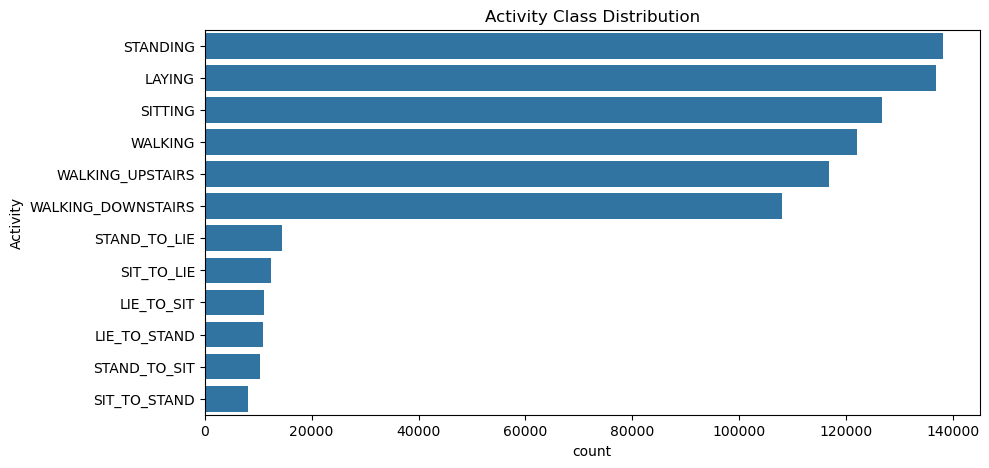

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=full_dataset["Activity"], order=full_dataset["Activity"].value_counts().index)
plt.title("Activity Class Distribution")
plt.show()

## 7. Correlation between attributes

In [ ]:
correlation_dataframe = full_dataset.drop(columns=["Activity"]).corr()

display(correlation_dataframe)

,X axis_acc,Y axis_acc,Z axis_acc,X axis_gyro,Y axis_gyro,Z axis_gyro
X axis_acc,1.000000,-0.676337,-0.582186,0.009182,0.040651,-0.011987
Y axis_acc,-0.676337,1.000000,0.558419,-0.054605,-0.002549,0.048439
Z axis_acc,-0.582186,0.558419,1.000000,-0.025221,-0.022633,0.025245
X axis_gyro,0.009182,-0.054605,-0.025221,1.000000,-0.164666,-0.026436
Y axis_gyro,0.040651,-0.002549,-0.022633,-0.164666,1.000000,0.002775
Z axis_gyro,-0.011987,0.048439,0.025245,-0.026436,0.002775,1.000000


## 8. Histograms

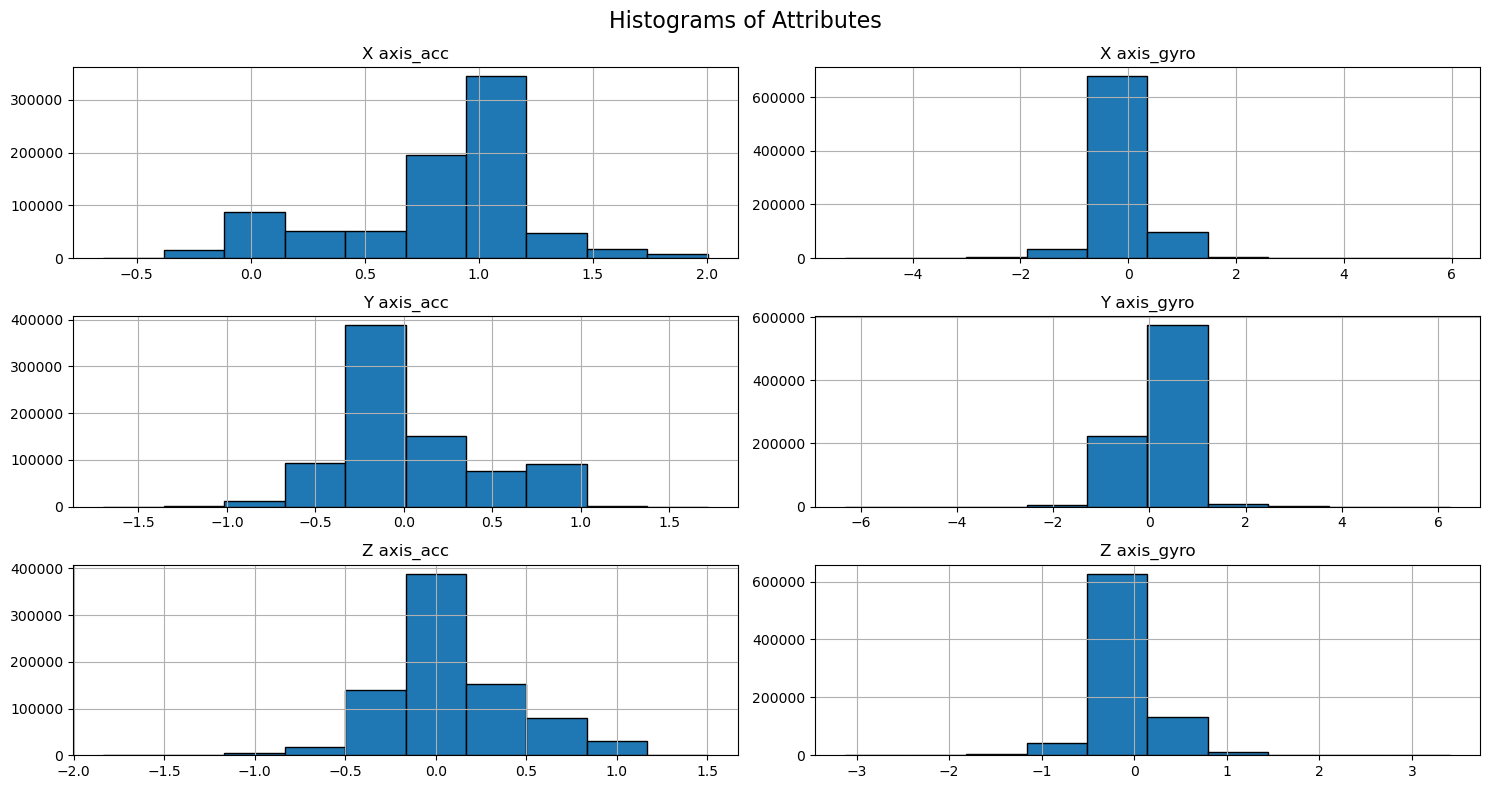

In [ ]:
columns_left = full_dataset.columns[:3]
columns_right = full_dataset.columns[3:6]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))

for i, col in enumerate(columns_left):
    full_dataset[col].hist(ax=axes[i, 0], bins=10, edgecolor='black')
    axes[i, 0].set_title(col)

for i, col in enumerate(columns_right):
    full_dataset[col].hist(ax=axes[i, 1], bins=10, edgecolor='black')
    axes[i, 1].set_title(col)


plt.suptitle("Histograms of Attributes", fontsize=16)
plt.tight_layout(w_pad=1, h_pad=1)
plt.show()


## 9. Density Plots

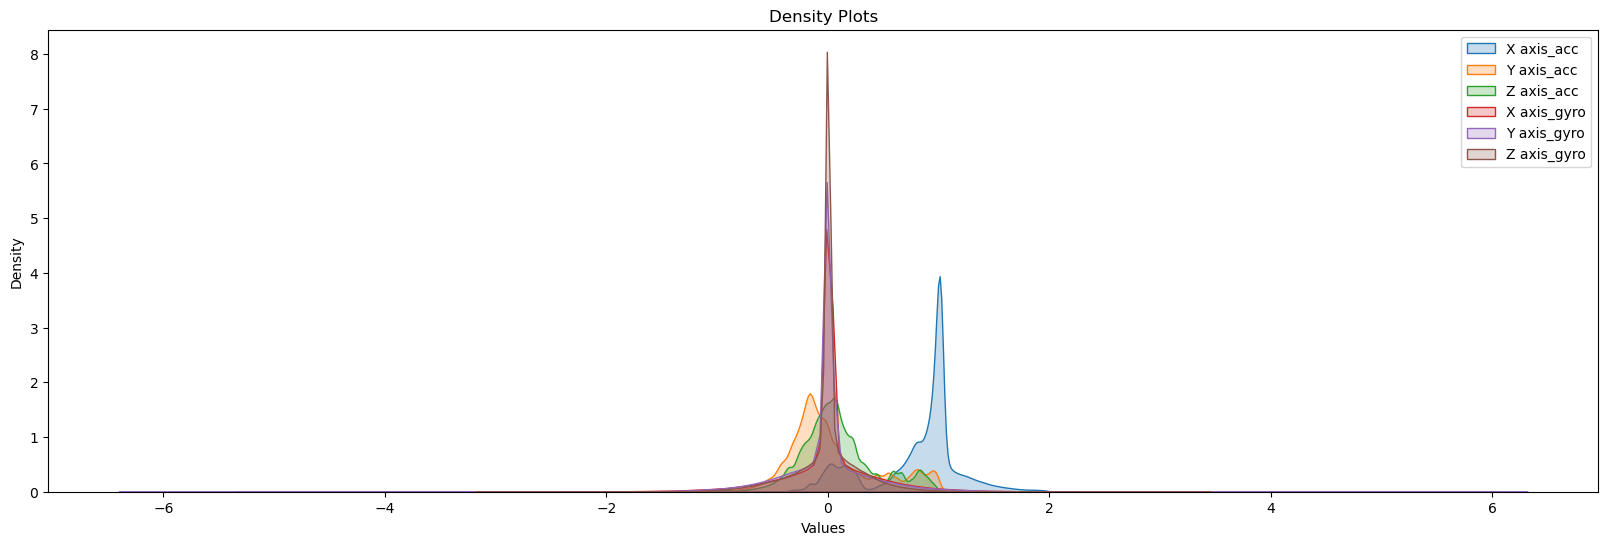

In [ ]:
plt.figure(figsize=(20, 6))
for col in full_dataset.select_dtypes(include=np.number):
    sns.kdeplot(full_dataset[col], fill=True, label=col)
plt.legend()
plt.title("Density Plots")
plt.xlabel("Values")
plt.show()

## 10. Boxplots

### Accelerometer data on X axis per activity

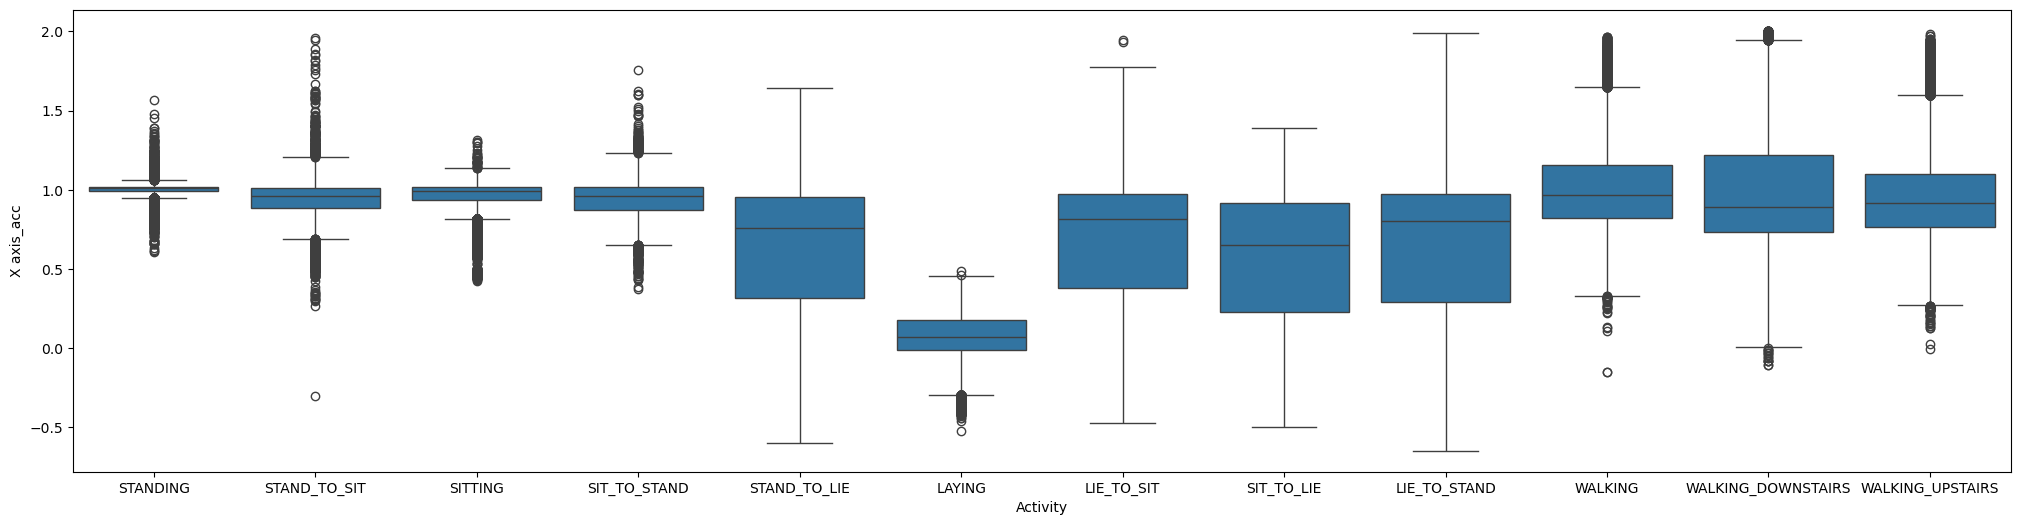

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="Activity", y="X axis_acc", data=full_dataset)
plt.show()

### Accelerometer data on Y axis per activity

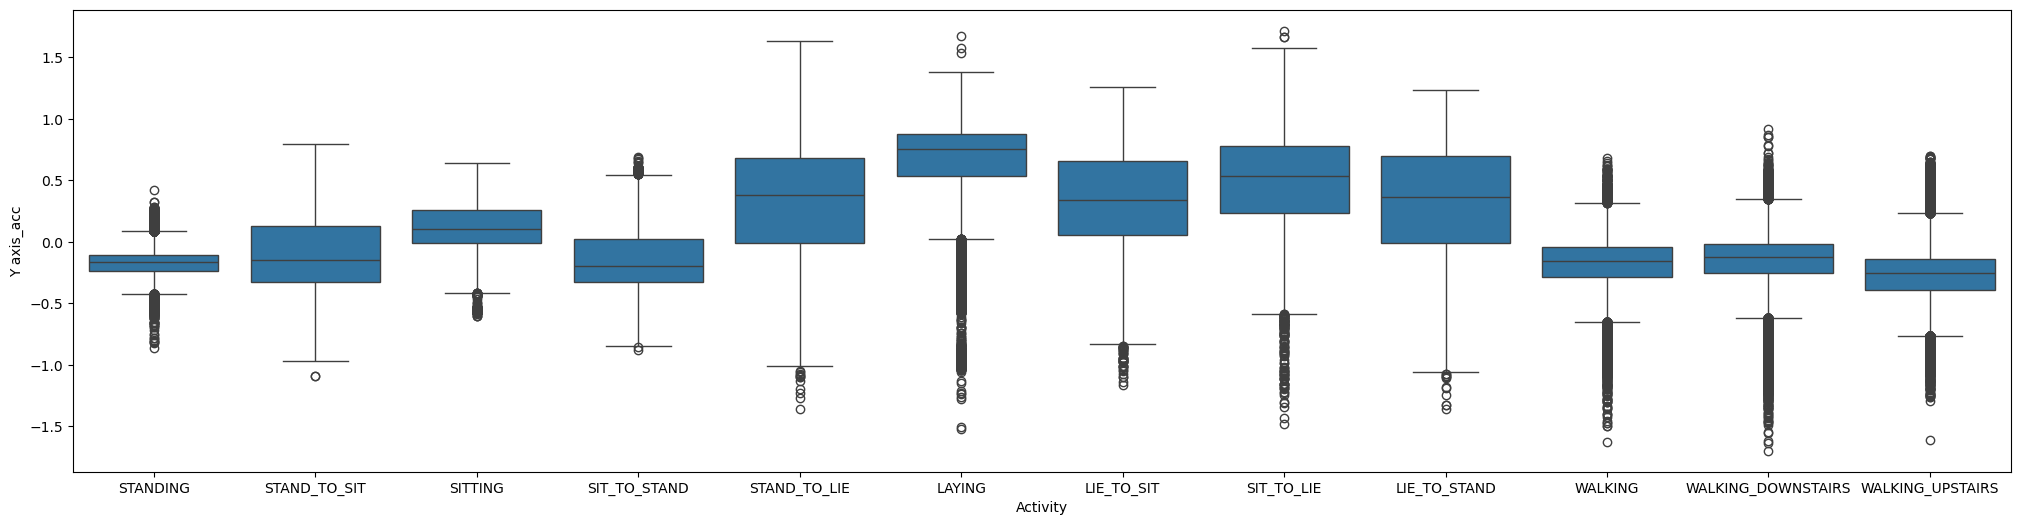

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="Activity", y="Y axis_acc", data=full_dataset)
plt.show()

### Accelerometer data on Z axis per activity

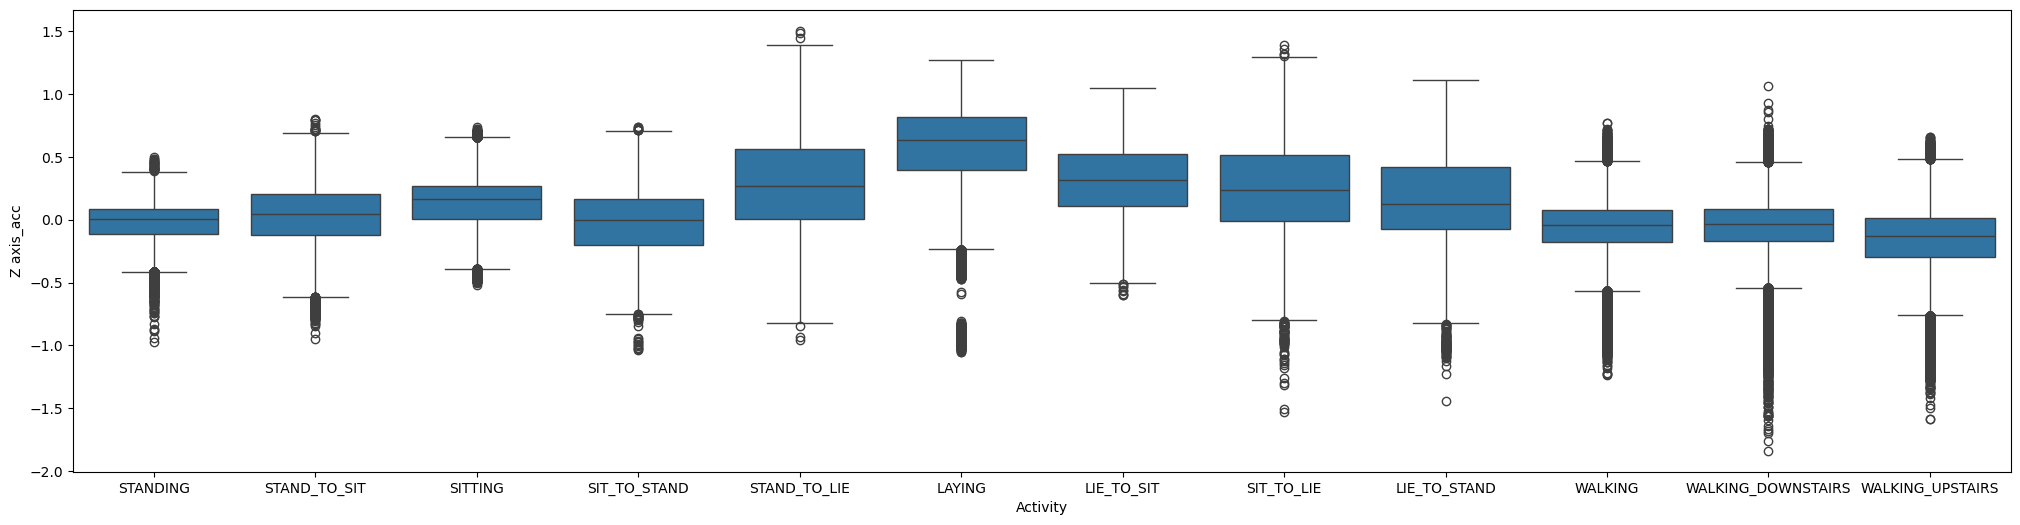

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="Activity", y="Z axis_acc", data=full_dataset)
plt.show()

### Gyroscope data on X axis per activity

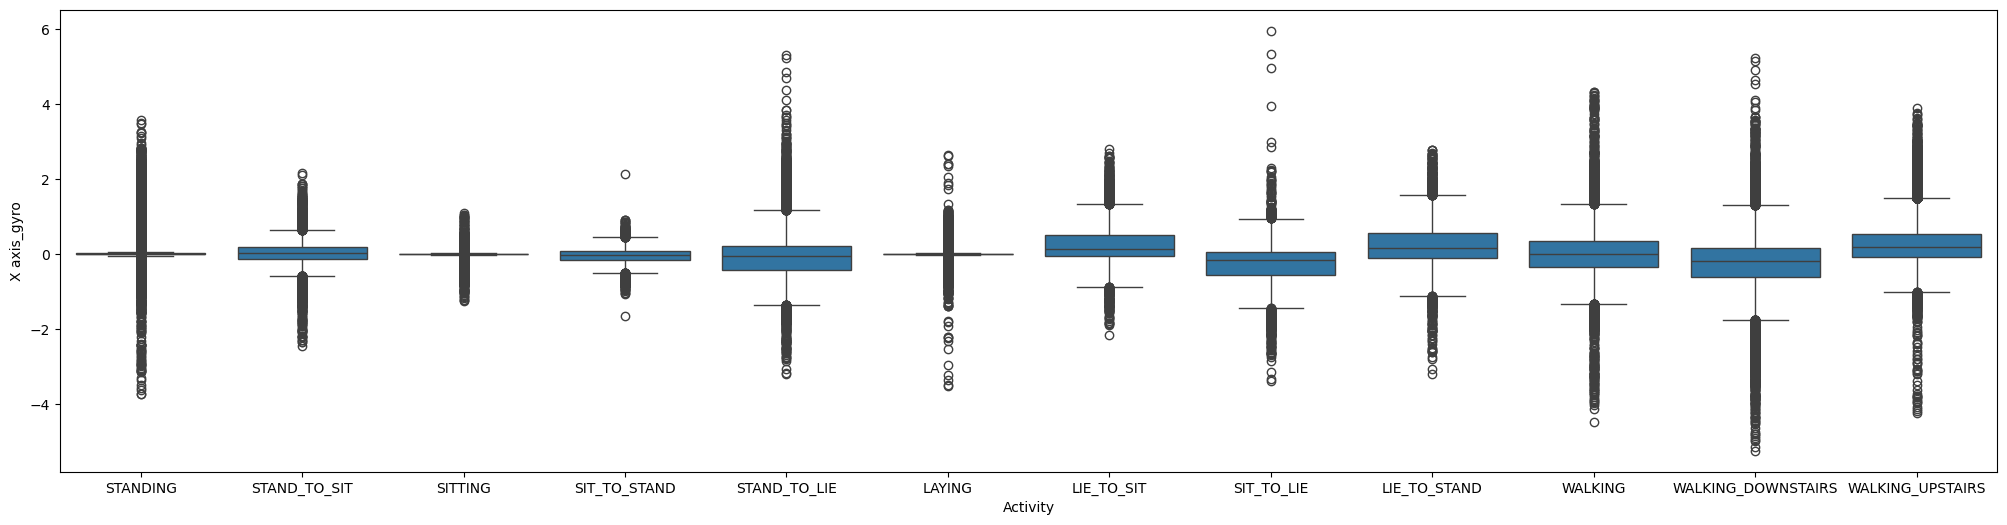

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="Activity", y="X axis_gyro", data=full_dataset)
plt.show()

### Gyroscope data on Y axis per activity

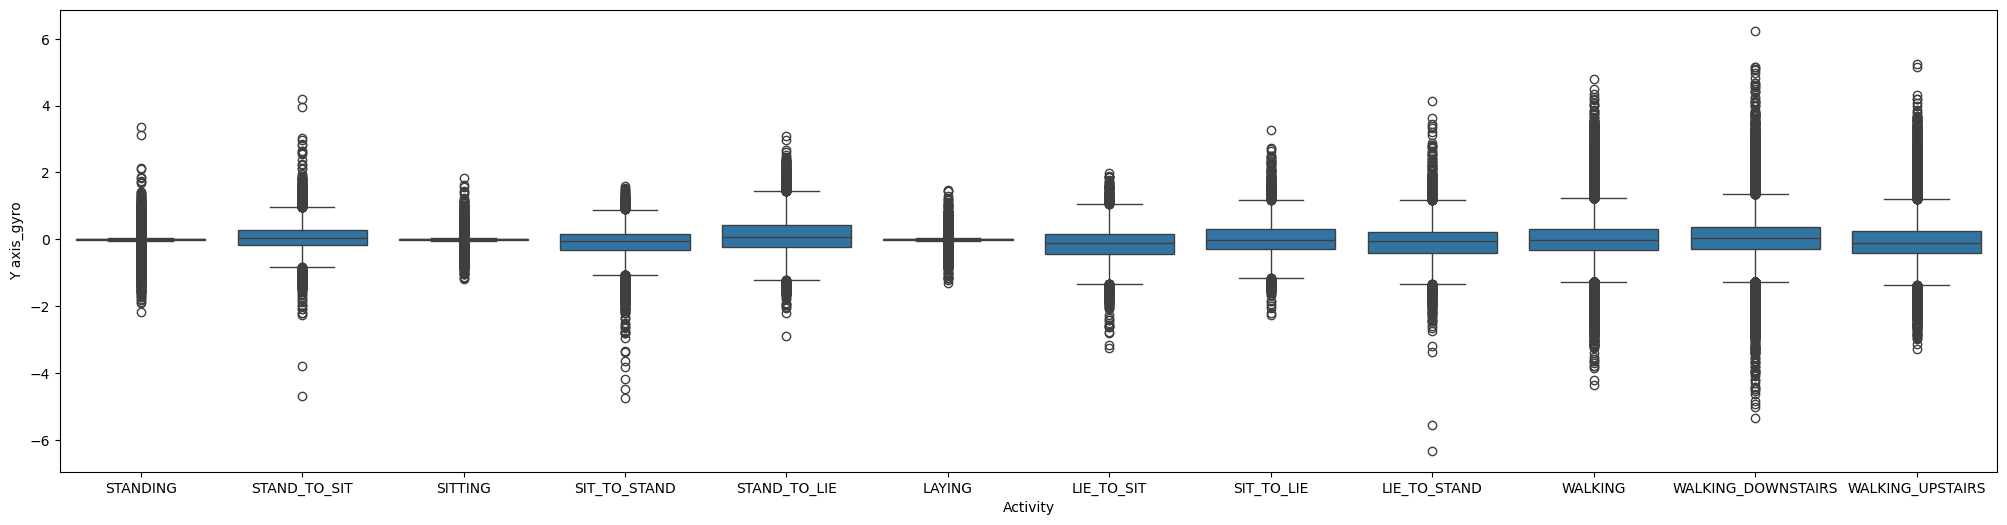

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="Activity", y="Y axis_gyro", data=full_dataset)
plt.show()

### Gyroscope data on Z axis per activity

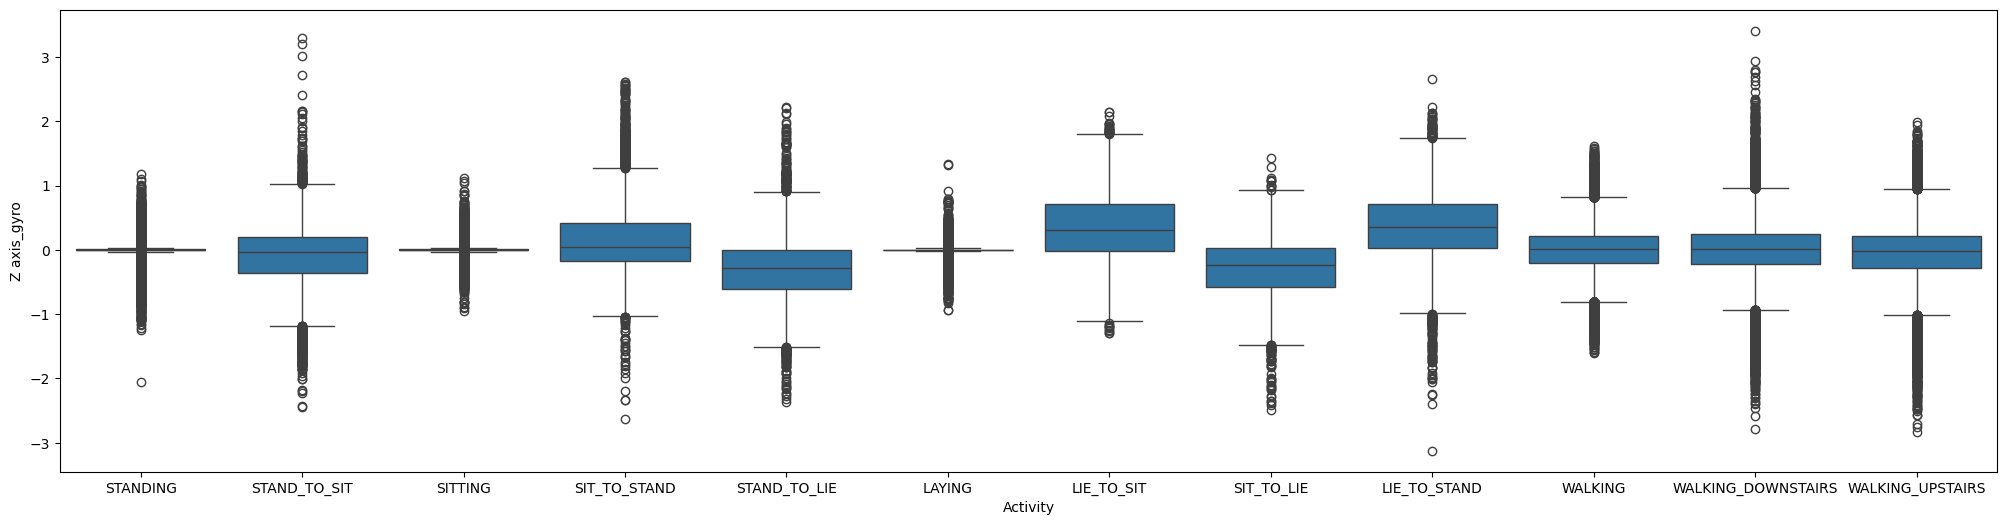

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x="Activity", y="Z axis_gyro", data=full_dataset)
plt.show()

## 11. Correlation matrix

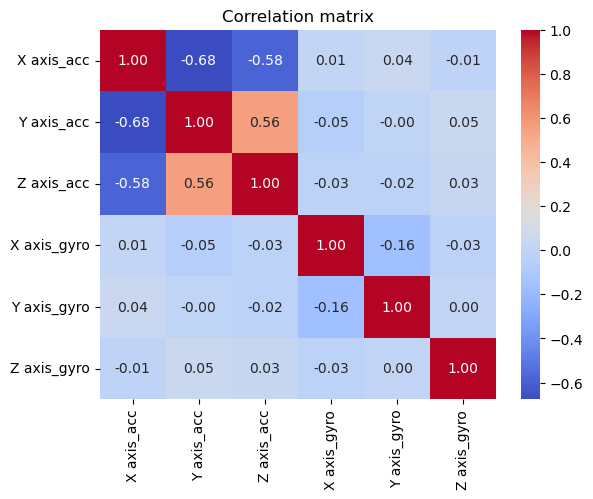

In [ ]:
correlation_dataframe = full_dataset.drop(columns=["Activity"]).corr()

sns.heatmap(correlation_dataframe, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

## 12. Scatter matrix

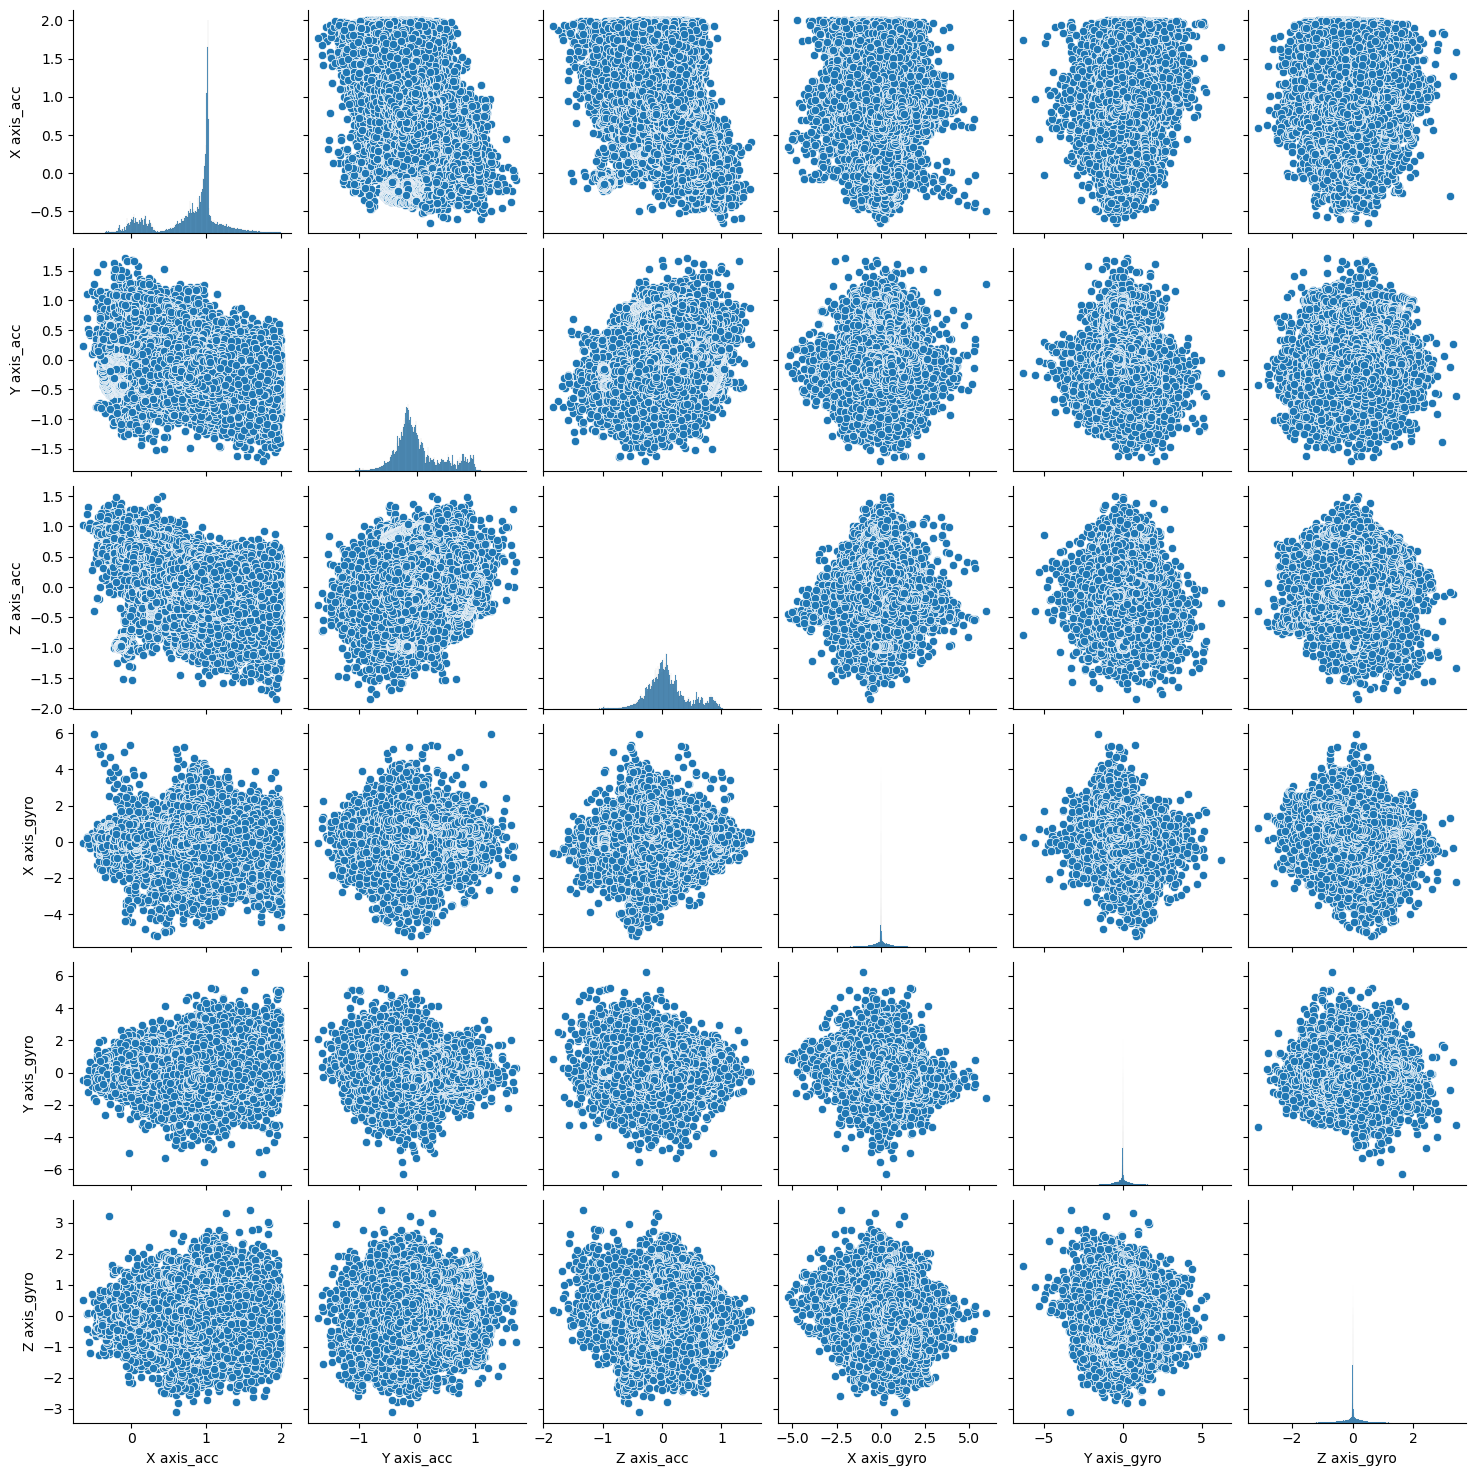

In [ ]:
sns.pairplot(full_dataset)

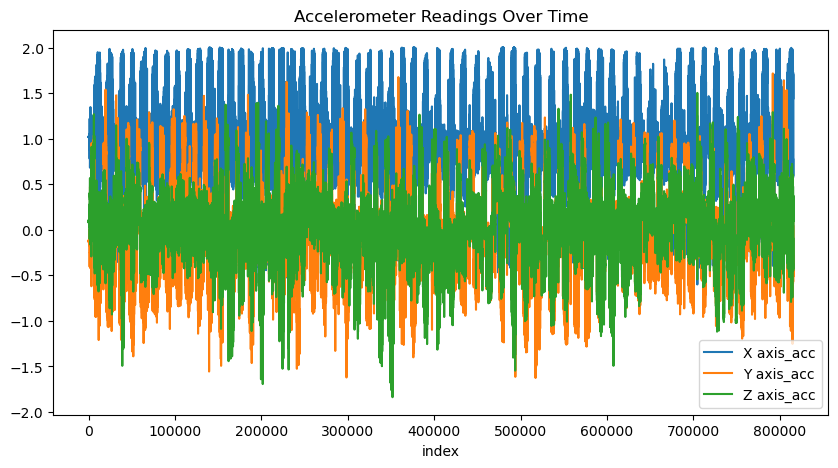

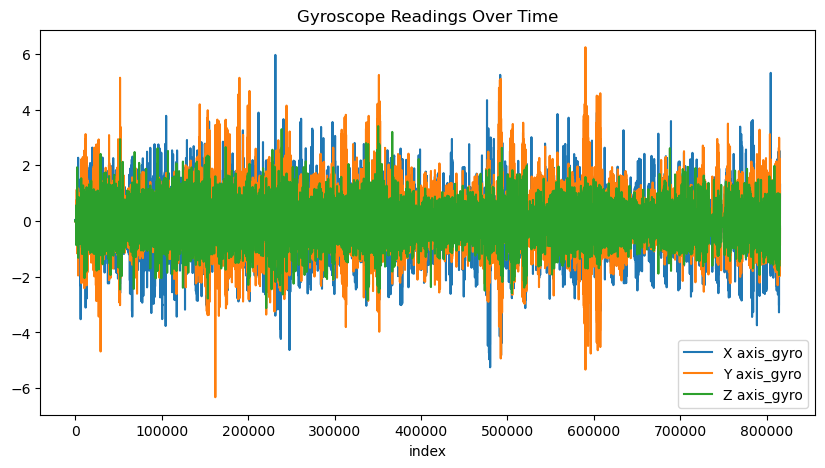

In [ ]:
full_dataset.reset_index().plot(x="index", y=["X axis_acc", "Y axis_acc", "Z axis_acc"], figsize=(10,5), title="Accelerometer Readings Over Time")
full_dataset.reset_index().plot(x="index", y=["X axis_gyro", "Y axis_gyro", "Z axis_gyro"], figsize=(10,5), title="Gyroscope Readings Over Time")
plt.show()

## 13. Feature extraction

In [ ]:
sampling_rate = 50
time_span = 3

window_size = sampling_rate * time_span
step_size = 150  # No overlap

def extract_features(window):
    features = {}

    acc_magnitude = np.sqrt(window['X axis_acc']**2 + window['Y axis_acc']**2 + window['Z axis_acc']**2)
    gyro_magnitude = np.sqrt(window['X axis_gyro']**2 + window['Y axis_gyro']**2 + window['Z axis_gyro']**2)

    for col in window.columns:
        features[f'{col}_mean'] = window[col].mean()

    for col in window.columns:
        features[f'{col}_std'] = window[col].std()

    for col in window.columns:
        features[f'{col}_max'] = window[col].max()

    features['acc_xy_corr'] = window[['X axis_acc', 'Y axis_acc']].corr().iloc[0,1]
    features['acc_xz_corr'] = window[['X axis_acc', 'Z axis_acc']].corr().iloc[0,1]
    features['acc_yz_corr'] = window[['Y axis_acc', 'Z axis_acc']].corr().iloc[0,1]

    features['gyro_xy_corr'] = window[['X axis_gyro', 'Y axis_gyro']].corr().iloc[0,1]
    features['gyro_xz_corr'] = window[['X axis_gyro', 'Z axis_gyro']].corr().iloc[0,1]
    features['gyro_yz_corr'] = window[['Y axis_gyro', 'Z axis_gyro']].corr().iloc[0,1]

    features['acc_magnitude_mean'] = acc_magnitude.mean()
    features['gyro_magnitude_mean'] = gyro_magnitude.mean()

    features['acc_magnitude_std'] = acc_magnitude.std()
    features['gyro_magnitude_std'] = gyro_magnitude.std()

    features['acc_magnitude_auc'] = acc_magnitude.sum()
    features['gyro_magnitude_auc'] = gyro_magnitude.sum()

    features['acc_magnitude_meandif'] = np.mean(np.abs(np.diff(acc_magnitude)))
    features['gyro_magnitude_meandif'] = np.mean(np.abs(np.diff(gyro_magnitude)))

    return features

segments = []
labels = []

for start in range(0, len(full_dataset) - window_size, step_size):
    window = full_dataset.iloc[start:start + window_size]
    features = extract_features(window.drop(columns=['Activity']))
    features['Activity'] = window['Activity'].mode()[0]
    segments.append(features)


full_dataset_features = pd.DataFrame(segments)


print(full_dataset_features.head())
print(full_dataset_features.columns)
full_dataset_features



   X axis_acc_mean  Y axis_acc_mean  Z axis_acc_mean  X axis_gyro_mean  \
0         1.019278        -0.124065         0.098463          0.011126   
1         1.020130        -0.127602         0.090815          0.001517   
2         1.020306        -0.126500         0.085787          0.001004   
3         1.020574        -0.135778         0.078583          0.003728   
4         1.021120        -0.133620         0.074981          0.007927   

   Y axis_gyro_mean  Z axis_gyro_mean  X axis_acc_std  Y axis_acc_std  \
0         -0.003462          0.002171        0.002599        0.004167   
1         -0.005042          0.005180        0.003144        0.007112   
2          0.000379         -0.000387        0.002739        0.004956   
3         -0.003065          0.005626        0.002894        0.007167   
4         -0.000324          0.001303        0.003670        0.007297   

   Z axis_acc_std  X axis_gyro_std  ...  gyro_yz_corr  acc_magnitude_mean  \
0        0.006087         0.014279  ...

,X axis_acc_mean,Y axis_acc_mean,Z axis_acc_mean,X axis_gyro_mean,Y axis_gyro_mean,Z axis_gyro_mean,X axis_acc_std,Y axis_acc_std,Z axis_acc_std,X axis_gyro_std,...,gyro_yz_corr,acc_magnitude_mean,gyro_magnitude_mean,acc_magnitude_std,gyro_magnitude_std,acc_magnitude_auc,gyro_magnitude_auc,acc_magnitude_meandif,gyro_magnitude_meandif,Activity
0,1.019278,-0.124065,0.098463,0.011126,-0.003462,0.002171,0.002599,0.004167,0.006087,0.014279,...,-0.391811,1.031537,0.016983,0.002750,0.011585,154.730478,2.547411,0.002579,0.004729,STANDING
1,1.020130,-0.127602,0.090815,0.001517,-0.005042,0.005180,0.003144,0.007112,0.007858,0.014730,...,-0.345786,1.032136,0.017814,0.003189,0.009726,154.820452,2.672080,0.002760,0.004603,STANDING
2,1.020306,-0.126500,0.085787,0.001004,0.000379,-0.000387,0.002739,0.004956,0.005328,0.014036,...,-0.589357,1.031716,0.016773,0.002805,0.009845,154.757367,2.515966,0.002519,0.004866,STANDING
3,1.020574,-0.135778,0.078583,0.003728,-0.003065,0.005626,0.002894,0.007167,0.007856,0.011213,...,-0.648619,1.032615,0.017803,0.002999,0.010669,154.892285,2.670486,0.002470,0.004491,STANDING
4,1.021120,-0.133620,0.074981,0.007927,-0.000324,0.001303,0.003670,0.007297,0.006793,0.014978,...,-0.428362,1.032599,0.020435,0.003753,0.013014,154.889922,3.065192,0.002902,0.006179,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,1.020444,-0.111389,0.073991,0.135337,0.063542,0.044491,0.347427,0.193255,0.177095,0.660813,...,-0.122342,1.057048,0.942324,0.361751,0.474939,158.557219,141.348550,0.096448,0.215867,WALKING_DOWNSTAIRS
5433,1.009528,-0.219583,0.024889,0.025178,-0.049000,0.033763,0.260438,0.152240,0.187390,0.315084,...,0.384141,1.058630,0.804020,0.270280,0.437937,158.794506,120.602954,0.066927,0.134284,WALKING_UPSTAIRS
5434,0.982389,-0.195648,-0.046481,0.574843,-0.164661,-0.092935,0.262729,0.176079,0.187472,0.678318,...,0.493857,1.031721,1.135234,0.275426,0.616567,154.758137,170.285117,0.078148,0.130199,WALKING_UPSTAIRS
5435,1.001694,-0.212491,-0.058093,0.441704,-0.132680,-0.025557,0.261502,0.172279,0.203355,0.532342,...,0.367273,1.056681,1.029207,0.272628,0.500729,158.502213,154.381053,0.076513,0.152952,WALKING_UPSTAIRS


## 14. Dataset split and scaling

In [ ]:
!pip3 install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

X = full_dataset_features.iloc[:, :-1]
y = full_dataset_features.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Shuffle = True by default

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply BorderlLineSMOTE only to training data

sm = BorderlineSMOTE(random_state=42, kind="borderline-1")
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

X_train_DF = pd.DataFrame(X_train)
X_test_DF = pd.DataFrame(X_test)
X_train_DF.columns = X_test_DF.columns = ['X axis_acc_mean', 'Y axis_acc_mean', 'Z axis_acc_mean',
       'X axis_gyro_mean', 'Y axis_gyro_mean', 'Z axis_gyro_mean',
       'X axis_acc_std', 'Y axis_acc_std', 'Z axis_acc_std', 'X axis_gyro_std',
       'Y axis_gyro_std', 'Z axis_gyro_std', 'X axis_acc_max',
       'Y axis_acc_max', 'Z axis_acc_max', 'X axis_gyro_max',
       'Y axis_gyro_max', 'Z axis_gyro_max', 'acc_xy_corr', 'acc_xz_corr',
       'acc_yz_corr', 'gyro_xy_corr', 'gyro_xz_corr', 'gyro_yz_corr',
       'acc_magnitude_mean', 'gyro_magnitude_mean', 'acc_magnitude_std',
       'gyro_magnitude_std', 'acc_magnitude_auc', 'gyro_magnitude_auc',
       'acc_magnitude_meandif', 'gyro_magnitude_meandif']

X_SMOTE_DF = pd.DataFrame(X_SMOTE)
X_SMOTE_DF.columns = ['X axis_acc_mean', 'Y axis_acc_mean', 'Z axis_acc_mean',
       'X axis_gyro_mean', 'Y axis_gyro_mean', 'Z axis_gyro_mean',
       'X axis_acc_std', 'Y axis_acc_std', 'Z axis_acc_std', 'X axis_gyro_std',
       'Y axis_gyro_std', 'Z axis_gyro_std', 'X axis_acc_max',
       'Y axis_acc_max', 'Z axis_acc_max', 'X axis_gyro_max',
       'Y axis_gyro_max', 'Z axis_gyro_max', 'acc_xy_corr', 'acc_xz_corr',
       'acc_yz_corr', 'gyro_xy_corr', 'gyro_xz_corr', 'gyro_yz_corr',
       'acc_magnitude_mean', 'gyro_magnitude_mean', 'acc_magnitude_std',
       'gyro_magnitude_std', 'acc_magnitude_auc', 'gyro_magnitude_auc',
       'acc_magnitude_meandif', 'gyro_magnitude_meandif']

#display(X_train_DF)
#display(X_SMOTE_DF)

original_distribution = Counter(y_train)
resampled_distribution = Counter(y_SMOTE)

display(original_distribution)
display(resampled_distribution)

/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Counter({'LAYING': 735,
         'STANDING': 734,
         'SITTING': 688,
         'WALKING': 667,
         'WALKING_UPSTAIRS': 591,
         'WALKING_DOWNSTAIRS': 587,
         'STAND_TO_LIE': 78,
         'SIT_TO_LIE': 65,
         'LIE_TO_SIT': 54,
         'STAND_TO_SIT': 54,
         'LIE_TO_STAND': 52,
         'SIT_TO_STAND': 44})

Counter({'WALKING_DOWNSTAIRS': 735,
         'WALKING_UPSTAIRS': 735,
         'SITTING': 735,
         'WALKING': 735,
         'LAYING': 735,
         'STANDING': 735,
         'STAND_TO_LIE': 735,
         'LIE_TO_STAND': 735,
         'LIE_TO_SIT': 735,
         'SIT_TO_STAND': 735,
         'STAND_TO_SIT': 735,
         'SIT_TO_LIE': 735})

## 15. Classifiers training

### 15.1. Building models, fitting data and testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
pipeline_logreg = make_pipeline(StandardScaler(), logreg)
pipeline_logreg.fit(X_train, y_train)

print("Logistic Regression\n")
print(f"Training set score: {pipeline_logreg.score(X_train, y_train)}")
print(f"Test set score: {pipeline_logreg.score(X_test, y_test)}")
crossValScore_LogReg5 = cross_val_score(pipeline_logreg, X, y, cv=5)
crossValScore_LogReg10 = cross_val_score(pipeline_logreg, X, y, cv=10)
print(f"Cross validation score with 5 folds: {crossValScore_LogReg5}")
print(f"Cross validation score with 10 folds: {crossValScore_LogReg10}")
print(f"Cross val score 5 folds mean: {crossValScore_LogReg5.mean()}")
print(f"Cross val score 10 folds mean: {crossValScore_LogReg10.mean()}")
print("")

# Random Forest

forest = RandomForestClassifier()
pipeline_forest = make_pipeline(forest)
pipeline_forest.fit(X_train, y_train)

print("Random Forests")
print(f"Training set score: {pipeline_forest.score(X_train, y_train)}")
print(f"Test set score: {pipeline_forest.score(X_test, y_test)}")
crossValScore_RF5 = cross_val_score(pipeline_forest, X, y, cv=5)
crossValScore_RF10 = cross_val_score(pipeline_forest, X, y, cv=10)
print(f"Cross validation score with 5 folds: {crossValScore_RF5}")
print(f"Cross validation score with 10 folds: {crossValScore_RF10}")
print(f"Cross val score 5 folds mean: {crossValScore_RF5.mean()}")
print(f"Cross val score 10 folds mean: {crossValScore_RF10.mean()}")
print("")

# Perceptron

perceptron = Perceptron()
pipeline_perceptron = make_pipeline(StandardScaler(), perceptron)
pipeline_perceptron.fit(X_train, y_train)

print("Perceptron")
print(f"Training set score: {pipeline_perceptron.score(X_train, y_train)}")
print(f"Test set score: {pipeline_perceptron.score(X_test, y_test)}")
crossValScore_Perceptron5 = cross_val_score(pipeline_perceptron, X, y, cv=5)
crossValScore_Perceptron10 = cross_val_score(pipeline_perceptron, X, y, cv=10)
print(f"Cross validation score with 5 folds: {crossValScore_Perceptron5}")
print(f"Cross validation score with 10 folds: {crossValScore_Perceptron10}")
print(f"Cross val score 5 folds mean: {crossValScore_Perceptron5.mean()}")
print(f"Cross val score 10 folds mean: {crossValScore_Perceptron5.mean()}")
print("")

Logistic Regression

Training set score: 0.9048057024603358
Test set score: 0.8823529411764706
Cross validation score with 5 folds: [0.88694853 0.81341912 0.83072677 0.88040478 0.89328427]
Cross validation score with 10 folds: [0.91360294 0.86580882 0.75       0.86213235 0.77757353 0.90441176
 0.85110294 0.90791897 0.9281768  0.86003683]
Cross val score 5 folds mean: 0.8609566940851778
Cross val score 10 folds mean: 0.862076494962626

Random Forests
Training set score: 1.0
Test set score: 0.9108455882352942
Cross validation score with 5 folds: [0.88786765 0.86121324 0.84636615 0.84728611 0.88776449]
Cross validation score with 10 folds: [0.91727941 0.88602941 0.82904412 0.89154412 0.81433824 0.89154412
 0.85477941 0.87108656 0.92081031 0.86372007]
Cross val score 5 folds mean: 0.8660995251366416
Cross val score 10 folds mean: 0.8740175766439172

Perceptron
Training set score: 0.848700850770292
Test set score: 0.8373161764705882
Cross validation score with 5 folds: [0.83180147 0.796875 

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pipelines = [pipeline_logreg, pipeline_forest, pipeline_perceptron]
pipeline_names = ['Logistic Regression', 'Random Forest', 'Perceptron']

for pipeline, pipeline_name in zip(pipelines, pipeline_names):
    scores = cross_val_score(pipeline, X, y, cv=skf)
    print(f"{pipeline_name} CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


# BEST MODEL IS RANDOM FOREST WITH STRATIFIEDKFOLD. SINCE SOME ACTIVITIES ARE UNDEREPRESENTED, I SUSPECT I'D GET MORE ACCURACY BY USING
# BALANCED CLASS WEIGHTING FOR ALL CLASSIFIERS

Logistic Regression CV accuracy: 0.8845 ± 0.0059
Random Forest CV accuracy: 0.9095 ± 0.0065
Perceptron CV accuracy: 0.8470 ± 0.0032


In [ ]:
evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Random Forest", y_test, y_pred_forest)
evaluate_model("Perceptron", y_test, y_pred_perceptron)

Logistic Regression Metrics
Accuracy:  0.8786764705882353
Precision: 0.8780412608416714
Recall:    0.8786764705882353
F1 Score:  0.8779361235916237

Random Forest Metrics
Accuracy:  0.9071691176470589
Precision: 0.9079487262014536
Recall:    0.9071691176470589
F1 Score:  0.9061236676476062

Perceptron Metrics
Accuracy:  0.8235294117647058
Precision: 0.8406218095265997
Recall:    0.8235294117647058
F1 Score:  0.8169166797096838



### 15.1.1 Building models with BorderlineSMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline

# Logistic Regression

pipeline_logreg_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('classifier', logreg)
])

pipeline_forest_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('classifier', forest)
])

pipeline_perceptron_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('classifier', perceptron)
])

pipeline_logreg_smote.fit(X_train, y_train)
pipeline_forest_smote.fit(X_train, y_train)
pipeline_perceptron_smote.fit(X_train, y_train)


test_pipeline_logreg = Pipeline([
    ('scaler', pipeline_logreg_smote.named_steps['scaler']),  # reuse fitted scaler
    ('classifier', pipeline_logreg_smote.named_steps['classifier'])  # reuse trained classifier
])

y_pred_logreg_smote = test_pipeline_logreg.predict(X_test)

test_pipeline_forest = Pipeline([
    ('scaler', pipeline_forest_smote.named_steps['scaler']),
    ('classifier', pipeline_forest_smote.named_steps['classifier'])
])

y_pred_forest_smote = test_pipeline_forest.predict(X_test)


test_pipeline_perceptron = Pipeline([
    ('scaler', pipeline_perceptron_smote.named_steps['scaler']),
    ('classifier', pipeline_perceptron_smote.named_steps['classifier'])
])

y_pred_perceptron_smote = test_pipeline_perceptron.predict(X_test)

evaluate_model("Logistic Regression", y_test, y_pred_logreg_smote)
evaluate_model("Random Forest", y_test, y_pred_forest_smote)
evaluate_model("Perceptron", y_test, y_pred_perceptron_smote)


print("Logistic Regression\n")
crossValScore_LogReg5 = cross_val_score(pipeline_logreg_smote, X, y, cv=5)
crossValScore_LogReg10 = cross_val_score(pipeline_logreg_smote, X, y, cv=10)
print(f"Cross validation score with 5 folds: {crossValScore_LogReg5}")
print(f"Cross validation score with 10 folds: {crossValScore_LogReg10}")
print(f"Cross val score 5 folds mean: {crossValScore_LogReg5.mean()}")
print(f"Cross val score 10 folds mean: {crossValScore_LogReg10.mean()}")
print("")

print("Random Forests")
crossValScore_RF5 = cross_val_score(pipeline_forest_smote, X, y, cv=5)
crossValScore_RF10 = cross_val_score(pipeline_forest_smote, X, y, cv=10)
print(f"Cross validation score with 5 folds: {crossValScore_RF5}")
print(f"Cross validation score with 10 folds: {crossValScore_RF10}")
print(f"Cross val score 5 folds mean: {crossValScore_RF5.mean()}")
print(f"Cross val score 10 folds mean: {crossValScore_RF10.mean()}")
print("")

print("Perceptron")
crossValScore_Perceptron5 = cross_val_score(pipeline_perceptron, X, y, cv=5)
crossValScore_Perceptron10 = cross_val_score(pipeline_perceptron, X, y, cv=10)
print(f"Cross validation score with 5 folds: {crossValScore_Perceptron5}")
print(f"Cross validation score with 10 folds: {crossValScore_Perceptron10}")
print(f"Cross val score 5 folds mean: {crossValScore_Perceptron5.mean()}")
print(f"Cross val score 10 folds mean: {crossValScore_Perceptron5.mean()}")
print("")

/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

Logistic Regression Metrics
Accuracy:  0.8713235294117647
Precision: 0.877009006382335
Recall:    0.8713235294117647
F1 Score:  0.873207729446176

Random Forest Metrics
Accuracy:  0.9117647058823529
Precision: 0.9165887412182478
Recall:    0.9117647058823529
F1 Score:  0.9111262662315779

Perceptron Metrics
Accuracy:  0.8134191176470589
Precision: 0.8378449324187249
Recall:    0.8134191176470589
F1 Score:  0.8179529554849596

Logistic Regression



/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

Cross validation score with 5 folds: [0.88051471 0.8125     0.83164673 0.86384545 0.87948482]
Cross validation score with 10 folds: [0.90625    0.84007353 0.73529412 0.85845588 0.77941176 0.89705882
 0.86029412 0.86556169 0.91160221 0.85635359]
Cross val score 5 folds mean: 0.8535983413604631
Cross val score 10 folds mean: 0.8510355730690067

Random Forests


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

Cross validation score with 5 folds: [0.87867647 0.84007353 0.84820607 0.84636615 0.89052438]
Cross validation score with 10 folds: [0.91360294 0.87132353 0.82169118 0.88419118 0.80147059 0.91544118
 0.86213235 0.86556169 0.92633517 0.87845304]
Cross val score 5 folds mean: 0.860769319227231
Cross val score 10 folds mean: 0.874020284909544

Perceptron
Cross validation score with 5 folds: [0.83180147 0.796875   0.80772769 0.82704692 0.87212511]
Cross validation score with 10 folds: [0.875      0.84558824 0.75551471 0.79227941 0.81433824 0.83455882
 0.79779412 0.86740331 0.87108656 0.78084715]
Cross val score 5 folds mean: 0.827115238919855
Cross val score 10 folds mean: 0.827115238919855



### 15.2. Plotting confusion matrixes for all models

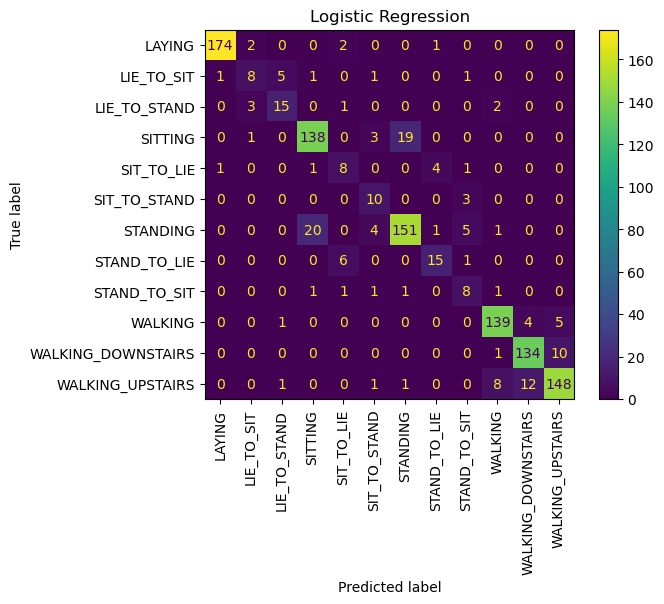

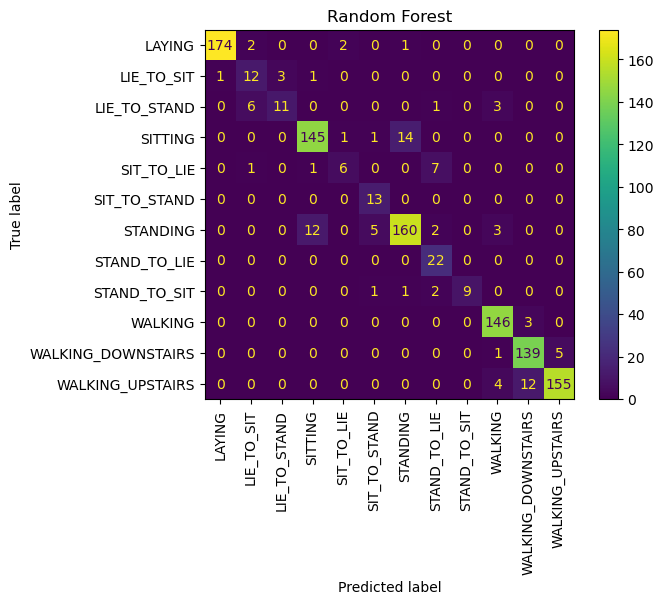

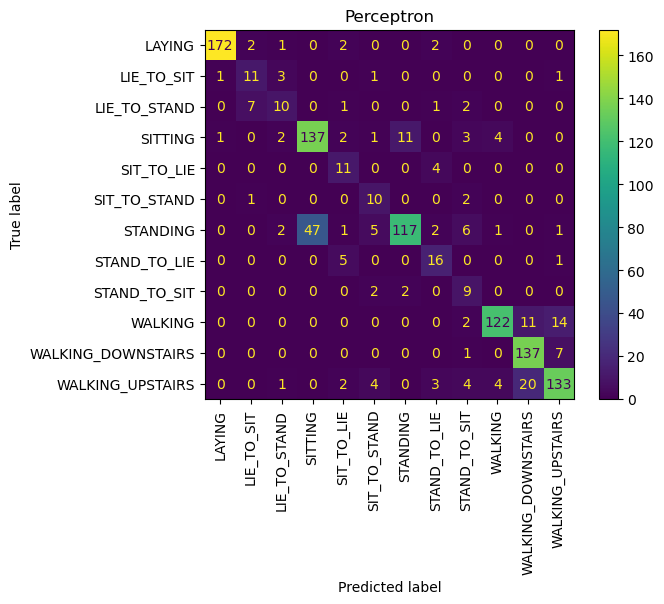

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

models = [pipeline_logreg_smote, pipeline_forest_smote, pipeline_perceptron_smote]
model_names = ["Logistic Regression", "Random Forest", "Perceptron"]

for model, name in zip(models, model_names):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.xticks(rotation=90)
    plt.title(name)
    plt.show()


### 15.3. Tuning-in hyperparameters via Grid search

In [ ]:
# WITH SMOTE
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Note: if best hyperparameters fall at the edges, we want to expand the grid to make sure we have found the true optimum (PDSH)

param_grid_logreg = [
    {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['saga'],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__max_iter': [500, 1000, 2000]
    },
    {
    'classifier__penalty': [None, 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['lbfgs'],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__max_iter': [500, 1000, 2000]
    }
]

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200, 350, 500, 1000],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

param_grid_perceptron = {
    'classifier__penalty': [None, 'l2', 'l1', 'elasticnet'],
    'classifier__alpha': [0.00007, 0.00006, 0.00005, 0.0001, 0.001, 0.01],
    'classifier__max_iter': [500, 1000, 2000, 5000],
    'classifier__class_weight': [None, 'balanced']
}

models = [
    ('Logistic Regression', pipeline_logreg_smote),
    ('Random Forest', pipeline_forest_smote),
    ('Perceptron', pipeline_perceptron_smote)
]

param_grids = [param_grid_logreg, param_grid_rf, param_grid_perceptron]

best_models = []
for (name, model), param_grid in zip(models, param_grids):
    print(f"\n Tuning {name}")
    grid = GridSearchCV(model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1) # using stratified k fold with shuffle true
    grid.fit(X_train, y_train)

    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-validated score: {grid.best_score_:.4f}")

    # Evaluate on the test set
    y_pred = grid.predict(X_test)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    best_models.append((name, grid.best_estimator_))



 Tuning Logistic Regression


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best cross-validated score: 0.8802

Classification Report for Logistic Regression:

                    precision    recall  f1-score   support

            LAYING       0.99      0.97      0.98       179
        LIE_TO_SIT       0.56      0.53      0.55        17
      LIE_TO_STAND       0.67      0.67      0.67        21
           SITTING       0.84      0.85      0.85       161
        SIT_TO_LIE       0.42      0.53      0.47        15
      SIT_TO_STAND       0.50      0.69      0.58        13
          STANDING       0.87      0.83      0.85       182
      STAND_TO_LIE       0.74      0.64      0.68        22
      STAND_TO_SIT       0.40      0.46      0.43        13
           WALKING       0.89      0.93      0.91       149
WALKING_DOWNSTAIRS       0.87      0.91      0.89       145
  WALKING

/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

Best parameters for Random Forest: {'classifier__class_weight': None, 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 350}
Best cross-validated score: 0.9094

Classification Report for Random Forest:

                    precision    recall  f1-score   support

            LAYING       0.99      0.97      0.98       179
        LIE_TO_SIT       0.58      0.65      0.61        17
      LIE_TO_STAND       0.86      0.57      0.69        21
           SITTING       0.91      0.90      0.90       161
        SIT_TO_LIE       0.67      0.40      0.50        15
      SIT_TO_STAND       0.62      1.00      0.76        13
          STANDING       0.91      0.87      0.89       182
      STAND_TO_LIE       0.65      1.00      0.79        22
      STAND_TO_SIT       1.00      0.85      0.92        13
           WALKING       0.94      0.98      0.96       149
WALKING_DOWNSTAIRS       0.91      0.95      0.93       145
  WALKING_UPSTAIRS       0.96  

/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

Best parameters for Perceptron: {'classifier__alpha': 0.0001, 'classifier__class_weight': None, 'classifier__max_iter': 500, 'classifier__penalty': 'l1'}
Best cross-validated score: 0.8420

Classification Report for Perceptron:

                    precision    recall  f1-score   support

            LAYING       0.98      0.97      0.97       179
        LIE_TO_SIT       0.61      0.65      0.63        17
      LIE_TO_STAND       0.47      0.67      0.55        21
           SITTING       0.89      0.76      0.82       161
        SIT_TO_LIE       0.39      0.60      0.47        15
      SIT_TO_STAND       0.29      0.77      0.43        13
          STANDING       0.84      0.81      0.82       182
      STAND_TO_LIE       0.61      0.64      0.62        22
      STAND_TO_SIT       0.14      0.08      0.10        13
           WALKING       0.95      0.67      0.79       149
WALKING_DOWNSTAIRS       0.80      0.97      0.87       145
  WALKING_UPSTAIRS       0.77      0.82      0.80 

## 16. Feature reduction

### 16.1. Reducing

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from imblearn.pipeline import Pipeline

# Principal Component Analysis (PCA)

pca = PCA(n_components=0.95)

pipeline_pca_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('pca', pca),
    ('classifier', logreg)
])

pipeline_pca_perceptron = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('pca', pca),
    ('classifier', perceptron)
])

pipeline_pca_forest = Pipeline([
    ('scaler', StandardScaler()),  # Optional for trees, but used for consistency
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('pca', pca),
    ('classifier', forest)
])

# Kernel PCA

kernelpca = KernelPCA(n_components=15)

pipeline_kpca_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('kpca', kernelpca),
    ('classifier', logreg)
])

pipeline_kpca_perceptron = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('kpca', kernelpca),
    ('classifier', perceptron)
])

pipeline_kpca_forest = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('kpca', kernelpca),
    ('classifier', forest)
])



In [ ]:
# === Fit on training data ===
for name, pipeline in [
    ('PCA_LogReg', pipeline_pca_logreg),
    ('PCA_Perceptron', pipeline_pca_perceptron),
    ('PCA_Forest', pipeline_pca_forest),
    ('KernelPCA_LogReg', pipeline_kpca_logreg),
    ('KernelPCA_Perceptron', pipeline_kpca_perceptron),
    ('KernelPCA_Forest', pipeline_kpca_forest)
]:
    print(f"Fitting {name}...")
    pipeline.fit(X_train, y_train)

# === Predict and evaluate ===
y_pred_pca_logreg = pipeline_pca_logreg.predict(X_test)
y_pred_pca_perceptron = pipeline_pca_perceptron.predict(X_test)
y_pred_pca_forest = pipeline_pca_forest.predict(X_test)

y_pred_kpca_logreg = pipeline_kpca_logreg.predict(X_test)
y_pred_kpca_perceptron = pipeline_kpca_perceptron.predict(X_test)
y_pred_kpca_forest = pipeline_kpca_forest.predict(X_test)

evaluate_model("PCA + Logistic Regression", y_test, y_pred_pca_logreg)
evaluate_model("PCA + Perceptron", y_test, y_pred_pca_perceptron)
evaluate_model("PCA + Random Forest", y_test, y_pred_pca_forest)

evaluate_model("KernelPCA + Logistic Regression", y_test, y_pred_kpca_logreg)
evaluate_model("KernelPCA + Perceptron", y_test, y_pred_kpca_perceptron)
evaluate_model("KernelPCA + Random Forest", y_test, y_pred_kpca_forest)



Fitting PCA_LogReg...


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Fitting PCA_Perceptron...


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Fitting PCA_Forest...


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Fitting KernelPCA_LogReg...


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Fitting KernelPCA_Perceptron...


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Fitting KernelPCA_Forest...


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


PCA + Logistic Regression Metrics
Accuracy:  0.23161764705882354
Precision: 0.2685951686886858
Recall:    0.23161764705882354
F1 Score:  0.21359799029263438

PCA + Perceptron Metrics
Accuracy:  0.24448529411764705
Precision: 0.3016814168173023
Recall:    0.24448529411764705
F1 Score:  0.2567055432121889

PCA + Random Forest Metrics
Accuracy:  0.4494485294117647
Precision: 0.4810976719870111
Recall:    0.4494485294117647
F1 Score:  0.4304136370028929

KernelPCA + Logistic Regression Metrics
Accuracy:  0.8272058823529411
Precision: 0.8350237287169455
Recall:    0.8272058823529411
F1 Score:  0.8288876074688626

KernelPCA + Perceptron Metrics
Accuracy:  0.7481617647058824
Precision: 0.7865370540051796
Recall:    0.7481617647058824
F1 Score:  0.7475340643171248

KernelPCA + Random Forest Metrics
Accuracy:  0.8556985294117647
Precision: 0.8578389161745571
Recall:    0.8556985294117647
F1 Score:  0.8555886985697922



In [ ]:
print("Cross-validation scores\n")

for name, pipeline, data in [
    ("PCA + Logistic Regression", pipeline_pca_logreg, X),
    ("PCA + Perceptron", pipeline_pca_perceptron, X),
    ("PCA + Random Forest", pipeline_pca_forest, X),
    ("KernelPCA + Logistic Regression", pipeline_kpca_logreg, X),
    ("KernelPCA + Perceptron", pipeline_kpca_perceptron, X),
    ("KernelPCA + Random Forest", pipeline_kpca_forest, X)
]:
    print(name)
    scores_5 = cross_val_score(pipeline, data, y, cv=5)
    scores_10 = cross_val_score(pipeline, data, y, cv=10)
    print(f"5-fold mean: {scores_5.mean():.4f}, 10-fold mean: {scores_10.mean():.4f}\n")


Cross-validation scores

PCA + Logistic Regression


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.8085, 10-fold mean: 0.8121

PCA + Perceptron


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.7195, 10-fold mean: 0.6866

PCA + Random Forest


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.8264, 10-fold mean: 0.8334

KernelPCA + Logistic Regression


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.8085, 10-fold mean: 0.8121

KernelPCA + Perceptron


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.7195, 10-fold mean: 0.6866

KernelPCA + Random Forest


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.8190, 10-fold mean: 0.8339



In [ ]:
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE

# === Configuración de clasificadores ===
logreg = LogisticRegression(max_iter=1000, random_state=42)
perceptron = Perceptron(max_iter=1000, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)

# === Configuración de validación cruzada para RFECV ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Pipelines con RFECV (Logistic Regression y Perceptron) ===

rfecv_logreg = RFECV(estimator=logreg, step=1, cv=cv, scoring='f1_weighted', n_jobs=-1)
pipeline_rfecv_logreg = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('feature_selection', rfecv_logreg),
    ('classifier', logreg)
])

rfecv_perceptron = RFECV(estimator=perceptron, step=1, cv=cv, scoring='f1_weighted', n_jobs=-1)
pipeline_rfecv_perceptron = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('feature_selection', rfecv_perceptron),
    ('classifier', perceptron)
])

# === Pipeline con SelectFromModel (Random Forest) ===

select_rf = SelectFromModel(estimator=forest, threshold="median")  # O usa "mean"
pipeline_select_rf = ImbPipeline([
    ('scaler', StandardScaler()),  # Opcional para Random Forest
    ('smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
    ('feature_selection', select_rf),
    ('classifier', forest)
])

for name, pipeline, data in [
    ('RFECV + Logistic Regression', pipeline_rfecv_logreg, X),
    ('RFECV + Perceptron', pipeline_rfecv_perceptron, X),
    ('SelectFromModel + Random Forest', pipeline_select_rf, X)
]:
    print(name)
    scores_5 = cross_val_score(pipeline, data, y, cv=5)
    scores_10 = cross_val_score(pipeline, data, y, cv=10)
    print(f"5-fold mean: {scores_5.mean():.4f}, 10-fold mean: {scores_10.mean():.4f}\n")



RFECV + Logistic Regression


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.8553, 10-fold mean: 0.8516

RFECV + Perceptron


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.8227, 10-fold mean: 0.7981

SelectFromModel + Random Forest


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

5-fold mean: 0.8558, 10-fold mean: 0.8573



## 17. Performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logreg_best = best_models[0][1]
forest_best = best_models[1][1]
perceptron_best = best_models[2][1]

y_pred_logreg = logreg_best.predict(X_test)
y_pred_forest = forest_best.predict(X_test)
y_pred_perceptron = perceptron_best.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"{name} Metrics")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
    print(f"Recall:    {recall_score(y_true, y_pred, average='weighted')}")
    print(f"F1 Score:  {f1_score(y_true, y_pred, average='weighted')}")
    print("")
    #sns.heatmap(confusion_matrix(y_true, y_pred), square=True, annot=True, cbar=False)
    #plt.xlabel('Predicted value')
    #plt.ylabel('True value')


evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Random Forest", y_test, y_pred_forest)
evaluate_model("Perceptron", y_test, y_pred_perceptron)

#display(pd.DataFrame(y_test))
#display(pd.DataFrame(y_pred_logreg))


Logistic Regression Metrics
Accuracy:  0.2523020257826888
Precision: 0.19826824164650267
Recall:    0.2523020257826888
F1 Score:  0.1731199176348857

Random Forest Metrics
Accuracy:  0.26519337016574585
Precision: 0.28853810400771723
Recall:    0.26519337016574585
F1 Score:  0.2009967936991626

Perceptron Metrics
Accuracy:  0.016574585635359115
Precision: 0.0003086515015895552
Recall:    0.016574585635359115
F1 Score:  0.0006060177563202601



/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [ ]:
# Obtener accuracy por fold (cv=10)
acc_perceptron = cross_val_score(perceptron, X_train, y_train, cv=10, scoring='accuracy')
acc_rf = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
acc_logreg = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')

# Unificar en una matriz para análisis estadístico
results_matrix = np.vstack([acc_perceptron, acc_rf, acc_logreg]).T

In [ ]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(*results_matrix.T)
print(f"Friedman statistic: {stat:.4f}, p-value: {p:.4f}")

Friedman statistic: 19.5385, p-value: 0.0001


In [ ]:
!pip3 install scikit-posthocs

import scikit_posthocs as sp
import pandas as pd
import numpy as np

# Crear DataFrame con los resultados por fold
df_scores = pd.DataFrame(results_matrix, columns=["Perceptron", "Random Forest", "Logistic Regression"])

# Test de Nemenyi post-hoc tras Friedman
nemenyi_result = sp.posthoc_nemenyi_friedman(df_scores.values)

# Etiquetar las filas y columnas con nombres de modelos
nemenyi_result.columns = df_scores.columns
nemenyi_result.index = df_scores.columns

# Mostrar tabla de p-valores
print("📌 Tabla de p-valores del test de Nemenyi:")
print(nemenyi_result.round(12))


📌 Tabla de p-valores del test de Nemenyi:
                     Perceptron  Random Forest  Logistic Regression
Perceptron             1.000000       0.000039             0.049475
Random Forest          0.000039       1.000000             0.109180
Logistic Regression    0.049475       0.109180             1.000000


## 18. Saving models to disk

In [ ]:
best_models

[('Logistic Regression',
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression',
                   LogisticRegression(C=10, max_iter=2000, solver='saga'))])),
 ('Random Forest',
  Pipeline(steps=[('randomforestclassifier',
                   RandomForestClassifier(class_weight='balanced', max_depth=20,
                                          n_estimators=350))])),
 ('Perceptron',
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('perceptron',
                   Perceptron(alpha=6e-05, max_iter=500, penalty='l1'))]))]

In [ ]:
!pip install joblib

from joblib import dump, load



#dump(logreg_best, 'logreg_best.joblib')
#dump(forest_best, 'forest_best.joblib')
#dump(perceptron_best, 'perceptron_best.joblib')

#dump(logreg, 'logreg.joblib')
#dump(forest, 'forest.joblib')
#dump(perceptron, 'perceptron.joblib')

## 19. Data fusion

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definir clasificadores base
clf_rf = RandomForestClassifier(random_state=42)
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_nb = GaussianNB()
clf_ada = AdaBoostClassifier(random_state=42)

for idx, (X, y) in enumerate(datasets, start=1):
    print(f"\n📊 Resultados para el Dataset {idx}:\n")

    # 1. Random Forest con BorderlineSMOTE dentro de pipeline (imblearn Pipeline)
    print("🔹 Agregación con Bosques Aleatorios (BorderlineSMOTE):")
    pipeline_rf_smote = Pipeline([
        ('smote', BorderlineSMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('rf', clf_rf)
    ])
    scores_rf = cross_validate(pipeline_rf_smote, X, y, cv=cv, scoring=scoring)
    for metric in scoring:
        print(f"{metric.capitalize()}: {np.mean(scores_rf[f'test_{metric}']):.4f}")

    # 2. Votación personalizada con BorderlineSMOTE
    print("\n🔹 Votación personalizada con BorderlineSMOTE (Logistic Regression, Random Forest, Naive Bayes):")

    acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

    for train_idx, test_idx in cv.split(X, y):
        # Convertir a numpy arrays para evitar problemas de tipo en fit_resample
        X_train, X_test = X.iloc[train_idx].values, X.iloc[test_idx].values
        y_train, y_test = y.iloc[train_idx].values, y.iloc[test_idx].values

        # Aplicar BorderlineSMOTE solo en train
        smote = BorderlineSMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Escalar datos
        scaler = StandardScaler()
        X_resampled = scaler.fit_transform(X_resampled)
        X_test_scaled = scaler.transform(X_test)

        # Entrenar clasificadores clonados para evitar "fit" compartido
        clf1 = clone(clf_lr).fit(X_resampled, y_resampled)
        clf2 = clone(clf_rf).fit(X_resampled, y_resampled)
        clf3 = clone(clf_nb).fit(X_resampled, y_resampled)

        # Predicciones de cada clasificador
        pred1 = clf1.predict(X_test_scaled)
        pred2 = clf2.predict(X_test_scaled)
        pred3 = clf3.predict(X_test_scaled)

        # Votación mayoritaria
        predictions = np.vstack((pred1, pred2, pred3)).T
        final_preds = []
        for preds in predictions:
            mode_val = pd.Series(preds).mode()
            final_preds.append(mode_val.iloc[0])
        final_preds = np.array(final_preds)


        # Evaluar métricas
        acc_scores.append(accuracy_score(y_test, final_preds))
        prec_scores.append(precision_score(y_test, final_preds, average='weighted', zero_division=0))
        rec_scores.append(recall_score(y_test, final_preds, average='weighted', zero_division=0))
        f1_scores.append(f1_score(y_test, final_preds, average='weighted', zero_division=0))

    # 3. AdaBoost con BorderlineSMOTE dentro de pipeline
    print("\n🔹 AdaBoost (BorderlineSMOTE):")
    pipeline_ada_smote = Pipeline([
        ('smote', BorderlineSMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('ada', clf_ada)
    ])
    scores_ada = cross_validate(pipeline_ada_smote, X, y, cv=cv, scoring=scoring)
    for metric in scoring:
        print(f"{metric.capitalize()}: {np.mean(scores_ada[f'test_{metric}']):.4f}")

    # Resultados de votación personalizada
    print("\nResultados de votación personalizada:")
    print(f"Accuracy:  {np.mean(acc_scores):.4f}")
    print(f"Precision: {np.mean(prec_scores):.4f}")
    print(f"Recall:    {np.mean(rec_scores):.4f}")
    print(f"F1 Score:  {np.mean(f1_scores):.4f}")



📊 Resultados para el Dataset 1:

🔹 Agregación con Bosques Aleatorios (BorderlineSMOTE):


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

Accuracy: 0.9136
Precision: 0.9175
Recall: 0.9136
F1: 0.9144

🔹 Votación personalizada con BorderlineSMOTE (Logistic Regression, Random Forest, Naive Bayes):


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS


🔹 AdaBoost (BorderlineSMOTE):


/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/envs/DS

Accuracy: 0.5443
Precision: 0.6526
Recall: 0.5443
F1: 0.4821

Resultados de votación personalizada:
Accuracy:  0.8930
Precision: 0.8979
Recall:    0.8930
F1 Score:  0.8940
